# Header

In [10]:
import sys
import getpass
sys.path.insert(0, '/Users/{}/Downloads/'.format(getpass.getuser()))
#from generic_functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import glob

###Setting pandas options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas_profiling as pp

from datetime import datetime
today=datetime.today().strftime('%Y%m%d')
print(today)

import pandas_profiling as pp


from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import glob
#glob.glob("*")

/tmp/ipykernel_20180/1307949300.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


20240301


In [11]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [12]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pyspark.sql.functions import *
from pyspark.sql.functions import concat, col, lit
from datetime import timedelta, date,datetime
from pyspark.sql.types import ArrayType,IntegerType
from pyspark.sql.window import Window
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
today=datetime.today().strftime('%Y%m%d')
print(today)

20240301


In [13]:
def gcp_daily_files(start, end, bucket_name, first_name, last_name, underscore, extension):
    from datetime import timedelta, date
    
    ## Check available files  
    from pyspark.sql import functions as F
    from google.cloud import storage
    client=storage.Client()
    #bucket_name = bucket_name  # nje nga hidden buckets qe ndodhet ne storage-in tone ne cloud eshte vfal-prod-aom-rawingested te cilen mund ta aksesoni vetem nepermjet python
    bucket = client.get_bucket(bucket_name)
    blobs = bucket.list_blobs(prefix = first_name)
    file = []
    for blob in blobs:
        file.append(blob.name)
        #print(blob.name)
        
    file = pd.DataFrame(file)   
    file.columns = ["file"]
        
    file["file"] = "gs://" + bucket_name + "/" + file["file"]
    
    from datetime import timedelta, date
    def daterange(start, end):
        for n in range(int ((end - start).days)+1):
            yield start + timedelta(n)
        
    dates = []
    file_location = []
    #start = date(2021, 11, 1)
    #end = date(2021, 11, 3)
    for dt in daterange(start, end):
        dates.append(dt.strftime("%Y%m%d"))
        data = dt.strftime("%Y%m%d")
        year = data[:4]
        month = data[4:6]
        day = data[6:8]
        #f = 'gs://vfal-prod-aom-processed/interaction_history/2021/11/01/DL_IH_OUTCOME_20211101*.csv'
        f = "gs://"+bucket_name+"/"+first_name+"/"+str(year)+"/"+str(month)+"/"+str(day)+"/"+last_name+"_"+str(year)+underscore+str(month)+underscore+str(day)+"*"+extension
        
        if file["file"].str.contains(f).sum()==1:
            file_location.append(f)
            #print(f)
        else:
            continue
    #file_location.append("gs://vfal-prod-aom-processed/interaction_history/"+{}+"/"+{}+"/*/*.csv".format(year, month))
    return file_location


def gcp_monthly_files(start, end, bucket_name, first_name, last_name, underscore, extension):
    from datetime import timedelta, date
    ## Check available files  
    from pyspark.sql import functions as F
    from google.cloud import storage
    client=storage.Client()
    #bucket_name = bucket_name  # nje nga hidden buckets qe ndodhet ne storage-in tone ne cloud eshte vfal-prod-aom-rawingested te cilen mund ta aksesoni vetem nepermjet python
    bucket = client.get_bucket(bucket_name)
    blobs = bucket.list_blobs(prefix = first_name)
    file = []
    for blob in blobs:
        file.append(blob.name)
        #print(blob.name)
        
    file = pd.DataFrame(file)   
    file.columns = ["file"]
        
    file["file"] = "gs://" + bucket_name + "/" + file["file"]
    
    from datetime import timedelta, date
    def daterange(start, end):
        for n in range(int ((end - start).days)+1):
            yield start + timedelta(n)
            
    dates = []
    file_location = []
    #start = date(2021, 11, 1)
    #end = date(2021, 11, 3)
    for dt in daterange(start, end):
        dates.append(dt.strftime("%Y%m"))
        data = dt.strftime("%Y%m")
        year = data[:4]
        month = data[4:6]
        #day = data[6:8]
        f = "gs://"+bucket_name+"/"+first_name+"/"+str(year)+"/"+str(month)+"/"+last_name+"_"+str(year)+underscore+str(month)+extension
        if file["file"].str.contains(f).sum()==1:
            file_location.append(f)
        else:
            continue
    #file_location.append("gs://vfal-prod-aom-processed/interaction_history/"+{}+"/"+{}+"/*/*.csv".format(year, month))
    file_location = list(set(file_location))
    return file_location

In [14]:
from pyspark.sql.functions import *

In [15]:
def gcp_files(start, end, bucket_name, first_name, last_name, underscore, extension):
    from datetime import timedelta, date
    
    ## Check available files  
    from pyspark.sql import functions as F
    from google.cloud import storage
    client=storage.Client()
    #bucket_name = bucket_name  # nje nga hidden buckets qe ndodhet ne storage-in tone ne cloud eshte vfal-prod-aom-rawingested te cilen mund ta aksesoni vetem nepermjet python
    bucket = client.get_bucket(bucket_name)
    blobs = bucket.list_blobs(prefix = first_name)
    file = []
    for blob in blobs:
        file.append(blob.name)
        #print(blob.name)
        
    file = pd.DataFrame(file)   
    file.columns = ["file"]
        
    file["file"] = "gs://" + bucket_name + "/" + file["file"]
    
    from datetime import timedelta, date
    def daterange(start, end):
        for n in range(int ((end - start).days)+1):
            yield start + timedelta(n)
        
    dates = []
    file_location = []
    #start = date(2021, 11, 1)
    #end = date(2021, 11, 3)
    for dt in daterange(start, end):
        dates.append(dt.strftime("%Y%m%d"))
        data = dt.strftime("%Y%m%d")
        year = data[:4]
        month = data[4:6]
        day = data[6:8]
        #f = 'gs://vfal-prod-aom-processed/interaction_history/2021/11/01/DL_IH_OUTCOME_20211101*.csv'
        f = "gs://"+bucket_name+"/"+first_name+"/"+str(year)+"/"+str(month)+"/"+str(day)+"/"+last_name+"_"+str(year)+underscore+str(month)+underscore+str(day)+"*"+extension
        
        if file["file"].str.contains(f).sum()==1:
            file_location.append(f)
            #print(f)
        else:
            continue
    #file_location.append("gs://vfal-prod-aom-processed/interaction_history/"+{}+"/"+{}+"/*/*.csv".format(year, month))
    return file_location


In [16]:
def read_from_pegadb(sql_query):
    import pandas as pd
    import psycopg2
    import pandas.io.sql as sqlio
    
    #Get username and password from file:
    file = pd.read_csv(r"gs://dataproc-689eddde-121c-4849-a316-3e62ff11fc44-europe-west1/notebooks/jupyter/Mirjan/pegadb_username_and_pass.csv")
    username=file["col_2"][0]
    password=file["col_2"][1]
    
    conn = psycopg2.connect(host="10.74.0.5",
                            database="postgres",
                            user=username,
                            password=password)
    
    #Connect to PegaDB
    print("Connected to PegaDB. Retrieving data. Please wait")

    from datetime import datetime
    now=datetime.now().strftime("%H:%M:%S")

    print("Execution started in: {} ".format(now))

    #global df
    df = sqlio.read_sql_query(sql_query, conn)     
    df.columns=df.columns.str.lower()

    print("--------------") 
    now=datetime.now().strftime("%H:%M:%S")
    print("Execution finished in: {} ".format(now))
    
    print("Done. Shape of the file is: ")
    print(df.shape)
    
    conn = None

    return df

In [17]:
def get_kpis(month_id_str, use_cols=None, nrows = None): #example '2021_07_1'

    year = month_id_str[:4]
    month_id = month_id_str[5:7]
    version = month_id_str[-1]

    import pandas as pd
    if use_cols==None:
        y=pd.read_csv("gs://vfal-prod-aom-processed/monthly_kpi/{}/{}/merge_kpi_{}.csv".format(year, month_id, month_id_str), 
                      nrows=nrows,
                    dtype={'ACCOUNT_ID': object})
        #y.columns=y.columns.str.lower()
    elif use_cols!=None:
        y=pd.read_csv("gs://vfal-prod-aom-processed/monthly_kpi/{}/{}/merge_kpi_{}.csv".format(year, month_id, month_id_str), 
                      usecols=[x for x in use_cols], 
                      nrows=nrows,
                     dtype={'ACCOUNT_ID': object})
        #y.columns=y.columns.str.lower()
    else:
        'NA'
    y.columns=y.columns.str.lower()

    y.rename(columns={"account_id": "msisdn"}, inplace=True)
    
    return y

# Getting Data

## Merge 1

In [18]:
month_id_str='2024_02_1'

In [19]:
keep_cols=[

    "ACCOUNT_ID",
    "COMPLAINTS_FLAG_1M",
    "ACTIVITY_FREQUENCY_3M",
    "ACTIVITY_STATUS",
    "ACT_MONTHS_3M",
    "ACT_MONTHS_6M",
    "ARPU_3M",
    "ARPU_6M",
    'AVG_DATA_M_BUNDLE_ALLOWANCE_3M',
    "AVG_DATA_USAGE_3M",
    "AVG_DATA_USAGE_6M",
    "AVG_DATA_IN_BUNDLE_3M",
    "AVG_DAY_USAGE_1M",
    "AVG_INTL_MIN_USAGE_3M",
    'Cluster',
    'ClusterName',
    'AVG_INVOICE_3m',
    'AVG_INVOICE_6m',
    "AVG_NAT_MIN_USAGE_3M",
    "AVG_RECHARGE_3M",
    "BUNDLE_MONTHS_3M",
    "Age",
    "CALLS_FLAG",
    "CONTRACT_DURATION",
    "COUNTY_1M",
    "DAILY_WEEKLY_CNT_3M",
    "DATA_USAGE_CHANGE_RATIO_3M",
    "DAYS_TO_LAST_M_BUNDLE_3M",
    "DAYS_TO_LAST_ACTIVITY_3M",
    "DAYS_TO_LAST_PORTOUT_REQUEST",
    "DAYS_TO_LAST_RECHARGE_3M",
    "DEVICES_NR",
    "DOUBLE_SIM_FLAG",
    "DOMESTIC_ARPU",
    "DOMESTIC_ARPU_3M",
    "LAST_M_BUNDLE_NAME_3M",
    "LAST_M_BUNDLE_PRICE_3M",
    'LAST_RECHARGE_VALUE_3M',
    'LAST_RECHARGE_VALUE_6M',
    'LAST_TOPUP_FLAG_2M',
    'MAX_BUNDLE_FEE_3M',
    'MAX_M_BUNDLE_FEE_6M',
    'MAX_RECHARGE_VALUE_3M',
    'MIN_RECHARGE_VALUE_3M',
    'MONTHS_IN_CONTRACT',
    'M_BUNDLE_AVERAGE_PRICE_3M',
    'M_BUNDLE_AVERAGE_PRICE_6M',
    'M_BUNDLE_CNT_3M',
    'M_BUNDLE_CNT_6M',
    'M_BUNDLE_PURCHASE_FREQUENCY_6M',
    'ONLINE_RECHARGER_FLAG_3M',
    'NR_MSISDNS_PER_IMEI',
    'PORTED_OUT_TOP5_1M',
    'PORTOUT_REQUEST_FLAG',
    'PREFERRED_BUNDLE_3M',
    'PREFERRED_BUNDLE_6M',
    'PREFERRED_CHANNEL_3M',
    'PREFERRED_POS_3M',
    'RECHARGE_FREQUENCY_3M',
    'RECHARGE_FREQUENCY_6M',
    'REGION_1M',
    'ROAMING_MONTHS_6M',
    'SMARTPHONE_FLAG',
    'SUBSCRIBER_CONTRACT_END_DATE',
    'SUBSCRIBER_CONTRACT_START_DATE',
    "TOT_RECHARGE_MONTHS_3M",
    'UPLIFT_KPI',
    'account_type',
    'customer_tenure',
    'generic_usage',
    'global_vf_segment',
    'home_cell_id',
    'home_cell_name',
    'part_of_abcom_footprint_flag',
    'subscriber_cosp',
    'subscriber_marketing_segment',
    'subscriber_tariff_plan',
    'subscriber_tenure',
    'tenure',
    'TOT_DATA_ADDON_CNT_3M',
    'TOT_DATA_ADDON_CNT_3M',
    "DEVICES_NR",
    "DEVICE_TYPE",
    'LAST_MO_IMEI',
    'LAST_MO_IMEI_STATUS',
    'PREFERABLE_IMEI',
    'NR_MSISDNS_PER_IMEI',
    'DAYS_TO_LAST_DIGITAL_ACTIVITY_3M',
    "ARPA",
    'ACTIVE_LINES_CNT',
    'INC_OUT_RATIO_3M',
    'PORTOUT_REQUEST_FLAG',
    'M_BUNDLE_FEE_DIFF',
    'INC_OFFNET_COMMUNITY_3M',
    '4g_traffic_share_1m',
    'DISTINCT_REGIONS_1M',
    'DAYS_TO_LAST_INC_OUT_ACTIVITY',
    'REQUEST_TOP5_1M',
    'INC_COMMUNITY_3M',
    'DAYS_TO_LAST_ACTIVITY_3M',
    'LAST_RECHARGE_VALUE_6M',
    'INC_TOP_5_OFFNET_COMM_1M',
    'ACTIVITY_FREQUENCY_3M',
    'PORTED_OUT_TOP5_1M',
    'TOT_DATA_ADDON_CNT_3M',
    'TOT_DATA_ADDON_CNT_3M',
    "DEVICES_NR",
    "DEVICE_TYPE",
    #'LAST_MO_IMEI',
    #'LAST_MO_IMEI_STATUS',
    'PREFERABLE_IMEI',
    'NR_MSISDNS_PER_IMEI',
    'DAYS_TO_LAST_DIGITAL_ACTIVITY_3M',
    'STANDARD_EXISTING_PLAN_FEE', 
    "OUT_OFFNET_COMMUNITY_3M", 
    "OUT_COMMUNITY_3M",
    'TOTAL_COMMUNITY_3M',
    'TOTAL_COMMUNITY_CHANGE_RATIO_3M'
]


#---------------->>>>>>>>>>>>>>> Please input the month here <<<<<<<<<<<<<<<<<<<

#df=get_kpis(use_cols=list(set(keep_cols)), month_id_str=month_id_str)

df = pd.read_csv(r"gs://vfal-prod-aom-processed/monthly_kpi/2024/02/merge_kpi_2024_02_1.csv", usecols=keep_cols, dtype={'ACCOUNT_ID':'object'})
df.rename(columns={'ACCOUNT_ID':'msisdn'}, inplace=True)
df.columns=df.columns.str.lower()
dim = pd.read_csv("gs://dataproc-689eddde-121c-4849-a316-3e62ff11fc44-europe-west1/notebooks/jupyter/city_region_map.csv")
dim.columns = dim.columns.str.lower()
dim.sample()

dim["region_1m"]=dim["region_1m"].apply(lambda x: str(x).lower())

df["region_1m"]=df["region_1m"].apply(lambda x: str(x).lower())

df=df.merge(dim, on='region_1m', how='left')

print(df.shape)
df=df[(df["activity_status"]!='INACTIVE') & (df["activity_status"].notnull()) & 
      #(df["account_type"]=='Consumer') & 
      (df["activity_status"]!='DISCONNECTED')]
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

for col in ["domestic_arpu", "domestic_arpu_3m", "arpu_6m", "act_months_3m", "act_months_6m", "avg_data_usage_6m", "m_bundle_cnt_3m", 
            "m_bundle_cnt_6m", "roaming_months_6m", "last_recharge_value_6m", "max_m_bundle_fee_6m", 
            "m_bundle_cnt_3m", "avg_data_usage_3m", "bundle_months_3m", "min_recharge_value_3m", "max_recharge_value_3m", "last_recharge_value_3m", "avg_data_in_bundle_3m"]:
    
    df[col].fillna(0, inplace=True)

df["pay_type"]=df["subscriber_tariff_plan"].apply(lambda x: 'Prepaid' if x in ["VFClub", "Club"] else 'Postpaid')
df["account_type"]=df["account_type"].apply(lambda x: 'Consumer' if x in ["Consumer"] else 'Enterprise')
df["preferred_bundle_3m"]=np.where(df["pay_type"]=='Prepaid', df["preferred_bundle_3m"].fillna("NoPreferredBundle"), "NonApplicable")
#df["preferred_bundle_6m"]=np.where(df["pay_type"]=='Prepaid', df["preferred_bundle_6m"].fillna("NoPreferredBundle"), "NonApplicable")
df["addon_user"] = df["tot_data_addon_cnt_3m"].apply(lambda x: 1 if x>=1 else 0)
df["m_bundle_user_3m"] = df["m_bundle_cnt_3m"].apply(lambda x: 1 if x>=1 else 0)
df["m_bundle_user_6m"] = df["m_bundle_cnt_6m"].apply(lambda x: 1 if x>=1 else 0)
df["data_user"] = df["avg_data_usage_3m"].apply(lambda x: 1 if x>0 else 0)
df["voice_user"] = df["avg_nat_min_usage_3m"].apply(lambda x: 1 if x>0 else 0)
df["digital_user_last_mo"] = df["days_to_last_digital_activity_3m"].apply(lambda x: 1 if x<=30 else 0)
df["intl_voice_user"] = df["avg_intl_min_usage_3m"].apply(lambda x: 1 if x>0 else 0)
df["arpu_3m"]=np.where(df["pay_type"]=='Prepaid', df["domestic_arpu_3m"], df["avg_invoice_3m"].fillna(0))


def bundle_user_type(df:pd.DataFrame()):
    x=df[0] #m_bundle_cnt
    y=df[1] #days_to_last_bundle
    z=df[2] #tenure
    if z=='NEW_USERS':
        return "NewCustomer"
    elif x==0:
        return "NonMonthlyUser"
    elif x>=3:
        return "RegularMonthlyUser"
    elif (x==2) & (y<40):
        return "RegularMonthlyUser"
    else:
        return "IrregularMonthlyUser"


    
df["bundle_user_type"]=df[["m_bundle_cnt_3m", "days_to_last_m_bundle_3m", "activity_status"]].apply(bundle_user_type, axis=1)

df["bundle_user_type"]=np.where(df["pay_type"]=='Prepaid', df["bundle_user_type"], "NonApplicable")


df["smartphone_flag"].fillna('False', inplace=True)
df["preferred_pos_3m"].fillna('NA', inplace=True)
df["preferred_channel_3m"].fillna('NA', inplace=True)
df["last_m_bundle_name_3m"].fillna('NA', inplace=True)
df["region"].fillna('NA', inplace=True)
df["region_1m"].fillna('NA', inplace=True)
df["area"].fillna('NA', inplace=True)
df["home_cell_name"].fillna('NA', inplace=True)
df["double_sim_flag"].fillna('NA', inplace=True)
df["global_vf_segment"].fillna('NA', inplace=True)
df["part_of_abcom_footprint_flag"].fillna("Unknown", inplace=True)
df["m_bundle_3m_cat"]=np.where(df["m_bundle_cnt_3m"]>=3, "3+", df["m_bundle_cnt_3m"].fillna(0))
df["m_bundle_6m_cat"]=np.where(df["m_bundle_cnt_6m"]>=3, "3+", df["m_bundle_cnt_6m"].fillna(0))
df.preferred_channel_3m.replace("MobPOS", "POS", inplace=True)
df.preferred_channel_3m.replace("Virtual Shop", "Shop", inplace=True)
df.preferred_channel_3m.replace("Own Shop", "Shop", inplace=True)
df["preferred_channel_3m"] = np.where(((df["preferred_channel_3m"]=='NA') & (df["online_recharger_flag_3m"]==True)), "Online", df["preferred_channel_3m"])

df["m_bundle_user_tot"]=np.where(df["pay_type"]=='Postpaid', "BundleUser", df["m_bundle_user_3m"].map({0: "NonMonthlyUser", 1: "BundleUser"}))
df["data_user"]=np.where(df['addon_user']==1, 1, df["data_user"])

df["low_minutes_tp"]=np.where(df["m_bundle_user_tot"]=='NonMonthlyUser', "NonMonthlyUser", 
                              np.where((df["subscriber_tariff_plan"].isin(["BusinessNextX", "VodafoneNextX"]) | 
                                        df["last_m_bundle_name_3m"].isin(["ClubMonthly27th", "ClubMonthly28th"])), 
                                       "LowMinutesTP", "NormalMinutesTP"))

df["days_to_last_m_bundle_3m_seg"]=np.where((df["pay_type"]=='Prepaid') & (df["days_to_last_m_bundle_3m"]<=30), 
                                            "BundleActive", np.where(df["pay_type"]=='Postpaid', "BundleActive", "NonBundleActive"))

df["is_postpaid"] = np.where(df["pay_type"]=='Postpaid', 1, 0)
df["is_hybrid"]=df["subscriber_tariff_plan"].astype(str).apply(lambda x: 1 if "Next" in x else 0)


df["complaints_flag_1m"]=df["complaints_flag_1m"].apply(lambda x: 1 if x==True else 0)
df["smartphone_flag"]=df["smartphone_flag"].apply(lambda x: 1 if x==True else 0)
df["is_youth_tp"]=df["subscriber_tariff_plan"].apply(lambda x: 1 if x in (["Club"]) else 0)
df["mnp_cust"]=df["msisdn"].apply(lambda x: 0 if str(x).startswith('35569') else 1)
df["roaming_user"]=df["roaming_months_6m"].apply(lambda x: 1 if x>0 else 0)
df["addon_user"]=df["tot_data_addon_cnt_3m"].apply(lambda x: 1 if x>1 else 0)
df["one_prefix"]=df["msisdn"].apply(lambda x: 1 if str(x).startswith('35568') else 0)
df["days_to_last_m_bundle_3m"].fillna(df.days_to_last_m_bundle_3m.max(), inplace=True)
df["avg_data_in_bundle_3m"].fillna(0, inplace=True)
df["last_recharge_value_6m"].fillna(0, inplace=True)
df["last_topup_flag_2m"].fillna(0, inplace=True)
df["nr_msisdns_per_imei"].fillna(1, inplace=True)
df.county_1m.fillna("NoRegion", inplace=True)
df["preferred_pos_3m"].fillna("None", inplace=True)
df["last_topup_flag_2m"]=pd.to_numeric(df["last_topup_flag_2m"])



bins=[0, 0.5, 2, 5, 8, 10, 15, 20, 30, 50, 100, 200, 500, 300000000]
labels=[]
bin_no=np.arange(0, len(bins))
for a, b, c in zip(bins, bins[1:], bin_no):
    #print(a, b)
    i="{}. {} to {} GB".format(c, a, b)
    labels.append(i)
labels[-1]= "{}. {} GB+".format(c, a)
df["data_usage_seg"]=pd.cut(df["avg_data_usage_3m"].fillna(0)/1024, bins=bins, right=False, labels=labels)


#Creating segments of arpu
bins=[0, 5, 100, 300, 500, 800, 1000, 1200, 1500, 1600, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 3000, 10000000]
labels=[]
bin_no=np.arange(0, len(bins))
for a, b, c in zip(bins, bins[1:], bin_no):
    #print(a, b)
    i="{}. [{} to {}) ALL".format(c, a, b)
    labels.append(i)
labels[-1]= "{}. [{} ALL+".format(c, a)
df["arpu_seg"]=pd.cut(df["arpu_3m"].fillna(0), bins=bins, right=False, labels=labels)


#Creating segments of arpu
bins=[0, 5, 100, 300, 500, 800, 1000, 1200, 1500, 1600, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 3000, 10000000]
labels=[]
bin_no=np.arange(0, len(bins))
for a, b, c in zip(bins, bins[1:], bin_no):
    #print(a, b)
    i="{}. [{} to {}) ALL".format(c, a, b)
    labels.append(i)
labels[-1]= "{}. [{} ALL+".format(c, a)
df["last_bundle_fee_seg"]=pd.cut(df["last_m_bundle_price_3m"], bins=bins, right=False, labels=labels)


#Creating segments of subscriber_tenure
bins=[0, 3, 6, 9, 12, 18, 24, 3*12, 5*12, 10000000]
labels=[]
bin_no=np.arange(0, len(bins))
for a, b, c in zip(bins, bins[1:], bin_no):
    #print(a, b)
    i="{}. [{} to {}) Months".format(c, a, b)
    labels.append(i)
labels[-1]= "{}. [{} Months+".format(c, a)
df["tenure_seg"]=pd.cut(df["subscriber_tenure"], bins=bins, right=False, labels=labels)



#Creating segments of subscriber_tenure
bins=[0, 3, 6, 9, 12, 18, 24, 10000000]
labels=[]
bin_no=np.arange(0, len(bins))
for a, b, c in zip(bins, bins[1:], bin_no):
    #print(a, b)
    i="{}. [{} to {}) Months".format(c, a, b)
    labels.append(i)
labels[-1]= "{}. [{} Months+".format(c, a)
df["months_in_contract_seg"]=np.where(df["pay_type"]=='Postpaid', pd.cut(df["months_in_contract"], bins=bins, right=False, labels=labels), 'None')

/opt/conda/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (12,59,60,71,72,73,75,76,104,123,134,139,212,224,282,283,293,311,336,337,340,341,343,359,360,361) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(4235655, 103)
(1310467, 103)
(1296239, 103)


#ADD Prepaid tariff plans data allowance

dct = {\
'BusinessNextX': 1024,
'BusinessNextS': 6144,
'BusinessNextM': 12288,
'BusinessNextL': 24576,
'VodafoneNextX': 400,
'VodafoneNextS': 3072,
'VodafoneNextM': 6144,
'VodafoneNextL': 12288,
'NextSPlusPromo': 12288,
'NextStart': 0,
'NextXPlusPromo': 2048,
"REDBlack": 200*1024, 
"Unlimited1800": 200*1024, 
"ConsUNLPlus": 200*1024
}

df["nominal_allowance"] = df["subscriber_tariff_plan"].map(dct)
df["bonus_allowance"] = np.where(df["nominal_allowance"].notnull(), df["data_allowance"] -  df["nominal_allowance"], np.NaN)
df["bonus_allowance"] = np.where(df["bonus_allowance"]<0, 0, df["bonus_allowance"])
df["data_utilization"] = df["avg_data_usage_3m"]/df["data_allowance"]

In [20]:
new_cols=[
    "msisdn", 
    "avg_data_m_bundle_allowance_3m",  
    #"prev_m_bundle_diff_2",
    "out_community_3m",
   # "inactive", 
   # "account_type", 
    "act_months_6m", 
    "active_lines_cnt", #owner of msisdns, active_lines_cnt change 
    "addon_user", 
    #"domestic_arpu",
    #"age", 
    "complaints_flag_1m",       
    "arpu_3m", 
    "avg_data_usage_3m", 
    "avg_nat_min_usage_3m", 
    "bundle_user_type", 
    "calls_flag",
    "county_1m", 
    "data_usage_change_ratio_3m", 
    "data_user", 
    #"days_to_last_activity_3m",
    #"days_to_last_inc_out_activity",
    #"devices_nr", 
    "digital_user_last_mo", 
    #"distinct_regions_1m", 
    #"inc_out_ratio_3m", 
    "intl_voice_user", 
    "double_sim_flag", 
    "is_youth_tp", 
    "m_bundle_purchase_frequency_6m", 
    #"mnp_cust", 
    #"nr_msisdns_per_imei", 
    #"ported_out_top5_1m", 
    "portout_request_flag", 
    "preferred_channel_3m", 
    "tot_recharge_months_3m",
    "m_bundle_user_3m",
    "total_community_3m",
    "total_community_change_ratio_3m",
    "subscriber_tenure",
    "days_to_last_m_bundle_3m",
    "avg_recharge_3m"
]

In [21]:
df1=df[(df["pay_type"]=='Prepaid') & (df["activity_status"]=='STABLY_ACTIVE') & (df["days_to_last_activity_3m"]<=10)&(df["account_type"]=='Consumer')][new_cols]

In [22]:
df1.sample()

,msisdn,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,bundle_user_type,calls_flag,county_1m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,portout_request_flag,preferred_channel_3m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m
3181726,197238670237,10240.0,4.0,6.0,2.0,0,0,789.33,1595.67,20.33,RegularMonthlyUser,False,DURRES,0.34,1,0,0,NA,0,54.67,False,Shop,2.0,1,14.0,-0.07,22.548387,18.0,1325.0


In [23]:
df1.preferred_channel_3m.value_counts()

Shop      139209
POS       136865
NA         56817
Online      9820
Name: preferred_channel_3m, dtype: int64

In [24]:
df1.isnull().sum()

msisdn                                  0
avg_data_m_bundle_allowance_3m     109572
out_community_3m                    45814
act_months_6m                           0
active_lines_cnt                        0
addon_user                              0
complaints_flag_1m                      0
arpu_3m                                 0
avg_data_usage_3m                       0
avg_nat_min_usage_3m                    0
bundle_user_type                        0
calls_flag                              0
county_1m                               0
data_usage_change_ratio_3m          83798
data_user                               0
digital_user_last_mo                    0
intl_voice_user                         0
double_sim_flag                         0
is_youth_tp                             0
m_bundle_purchase_frequency_6m     118928
portout_request_flag                    0
preferred_channel_3m                    0
tot_recharge_months_3m                  0
m_bundle_user_3m                  

## Creating new KPIs

### **AVG of days without activity**

**Outgoing**

In [25]:
yyyy, mm, dd = str(today)[0:4], str(today)[4:6], str(today)[6:8]
d1=date(int(yyyy), int(mm), int(dd))
d0=d1+pd.Timedelta(days=-30)
print(d0,d1)

2024-01-31 2024-03-01


In [26]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pyspark.sql.functions import *
from pyspark.sql.functions import concat, col, lit
from datetime import timedelta, date,datetime
from pyspark.sql.types import ArrayType,IntegerType
from pyspark.sql.window import Window
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
today=datetime.today().strftime('%Y%m%d')
print(today)

20240301


In [27]:
#My Path: "gs://vfal-prod-aom-processed/daily_kpi/2021/"
bucket_name = "vfal-prod-aom-processed"
first_name = "daily_kpi"
last_name = "daily_outgoing_kpis"
underscore = "_"
extension = ".csv"
file_location = gcp_daily_files(d0, d1, bucket_name, first_name, last_name, underscore, extension)
file_location
date(2022, 2, 22)
%timeit
out = spark.read.format("csv").option("header", True).option("delimiter", ",").load(file_location).select("A_PARTY_NUMBER", "LOCAL_DATE")\
                                                     .filter((col("CALLS_COUNT")>0) | (col("SMS_COUNT")>0))
print('The file has : ' +str(out.count()) +' records')
out = out.withColumn("LOCAL_DATE", to_date(col("LOCAL_DATE")))
out = out.withColumn("day_id", to_date(col("LOCAL_DATE"), "yyyymmdd"))
out.show(5, truncate=False)
out.createOrReplaceTempView("out")

24/03/01 10:23:21 WARN com.google.cloud.hadoop.fs.gcs.GhfsStorageStatistics: Detected potential high latency for operation op_glob_status. latencyMs=175; previousMaxLatencyMs=0; operationCount=30; context=path=gs://vfal-prod-aom-processed/daily_kpi/2024/02/22/daily_outgoing_kpis_2024_02_22*.csv; pattern=com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystemBase$$Lambda$678/1948875291@453f9310
24/03/01 10:23:21 WARN com.google.cloud.hadoop.fs.gcs.GhfsStorageStatistics: Detected potential high latency for operation op_glob_status. latencyMs=182; previousMaxLatencyMs=175; operationCount=30; context=path=gs://vfal-prod-aom-processed/daily_kpi/2024/02/11/daily_outgoing_kpis_2024_02_11*.csv; pattern=com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystemBase$$Lambda$678/1948875291@453f9310
24/03/01 10:23:21 WARN com.google.cloud.hadoop.fs.gcs.GhfsStorageStatistics: Detected potential high latency for operation op_glob_status. latencyMs=186; previousMaxLatencyMs=182; operationCount=30; context=p

The file has : 151682291 records
+--------------+----------+----------+
|A_PARTY_NUMBER|LOCAL_DATE|day_id    |
+--------------+----------+----------+
|481726875382  |2024-01-31|2024-01-31|
|613087924384  |2024-01-31|2024-01-31|
|432762586238  |2024-01-31|2024-01-31|
|881487243808  |2024-01-31|2024-01-31|
|017432208864  |2024-01-31|2024-01-31|
+--------------+----------+----------+
only showing top 5 rows



**Incoming**

In [28]:
#My Path: "gs://vfal-prod-aom-processed/daily_kpi/2021/"
bucket_name = "vfal-prod-aom-processed"
first_name = "daily_kpi"
last_name = "daily_incoming_kpis"
underscore = "_"
extension = ".csv"
file_location = gcp_files(d0, d1, bucket_name, first_name, last_name, underscore, extension)
file_location
%timeit
dfIncoming = spark.read.format("csv").option("header", True).option("delimiter", ",").load(file_location).select("B_PARTY_NUMBER", "LOCAL_DATE")
dfIncoming.createOrReplaceTempView("incoming_table")
print('The file has : ' +str(dfIncoming.count()) +' records')
dfIncoming = dfIncoming.withColumn("LOCAL_DATE", to_date(col("LOCAL_DATE")))
dfIncoming = dfIncoming.withColumn("day_id", to_date(col("LOCAL_DATE"), "yyyymmdd"))
dfIncoming.show(5, truncate=False)
dfIncoming.createOrReplaceTempView("inc")

The file has : 99392165 records
+--------------+----------+----------+
|B_PARTY_NUMBER|LOCAL_DATE|day_id    |
+--------------+----------+----------+
|099345133418  |2024-01-31|2024-01-31|
|292114663038  |2024-01-31|2024-01-31|
|810471738975  |2024-01-31|2024-01-31|
|594700333691  |2024-01-31|2024-01-31|
|057299440068  |2024-01-31|2024-01-31|
+--------------+----------+----------+
only showing top 5 rows



**Data Usage**

In [29]:
## My Path: "gs://vfal-prod-aom-processed/daily_kpi/2021/daily_usage_kpis_yyyy_MM_dd"
bucket_name = "vfal-prod-aom-processed"
first_name = "daily_kpi"
last_name = "daily_usage_kpis"
underscore = "_"
extension = ".csv"
file_location = gcp_daily_files(d0, d1, bucket_name, first_name, last_name, underscore, extension)
file_location

%timeit
usage = spark.read.format("csv").option("header", True).option("delimiter", ",").load(file_location).select("ACCOUNT_ID", "LOCAL_DATE").filter(col("DAILY_DATA_USAGE")>0)
print('The file has : ' +str(usage.count()) +' records')
usage = usage.withColumn("LOCAL_DATE", to_date(col("LOCAL_DATE")))
usage = usage.withColumn("day_id", to_date(col("LOCAL_DATE"), "yyyymmdd"))
usage.show(10, truncate=False)
usage.createOrReplaceTempView("usage")

The file has : 15985365 records
+------------+----------+----------+
|ACCOUNT_ID  |LOCAL_DATE|day_id    |
+------------+----------+----------+
|210316873332|2024-01-31|2024-01-31|
|235786991894|2024-01-31|2024-01-31|
|336842480132|2024-01-31|2024-01-31|
|461084572317|2024-01-31|2024-01-31|
|809212307663|2024-01-31|2024-01-31|
|430903141561|2024-01-31|2024-01-31|
|409038089311|2024-01-31|2024-01-31|
|681385407751|2024-01-31|2024-01-31|
|937923222528|2024-01-31|2024-01-31|
|417918685461|2024-01-31|2024-01-31|
+------------+----------+----------+
only showing top 10 rows



In [30]:
#usage.groupby("day_id").agg(count("ACCOUNT_ID").alias("ACCOUNT_ID")).sort(col("day_id")).show(100)

In [31]:
data_inc = spark.sql("""

select msisdn,
round(avg(day_diff),0) as avgdays_without_activity_1m
from
(
Select msisdn, activity_day,lag(activity_day) over (partition by msisdn order by activity_day ) as lag,
DATEDIFF (activity_day, (lag(activity_day) over (partition by msisdn order by activity_day))) as day_diff
from (
Select distinct msisdn, activity_day
from (
select msisdn,
activity_day
from 
(
select A_PARTY_NUMBER as msisdn,
day_id as activity_day,
row_number() over (partition by A_PARTY_NUMBER, day_id order by day_id) as rnk1
from out
) t1 
where rnk1 = 1

union all

select msisdn,
activity_day
from 
(
select ACCOUNT_ID as msisdn,
day_id as activity_day,
row_number() over (partition by ACCOUNT_ID, day_id order by day_id) as rnk2
from usage
) t2
where rnk2=1))
---order by activity_day,msisdn
)
group by msisdn
""").toPandas()

In [32]:
data_inc.sample(3)

,msisdn,avgdays_without_activity_1m
1898899,038128878013,2.0
114947,171590802075,1.0
1303277,323431892195,NaN


In [33]:
data_inc.sample()

,msisdn,avgdays_without_activity_1m
1816406,680698439953,1.0


In [34]:
df1=df1.merge(data_inc,on='msisdn',how='left')

In [35]:
df1.sample()

,msisdn,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,bundle_user_type,calls_flag,county_1m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,portout_request_flag,preferred_channel_3m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m
117292,656548281366,13994.67,15.67,6.0,1.0,0,0,1835.0,11533.33,155.33,RegularMonthlyUser,True,VLORE,-0.89,1,0,0,False,0,33.0,False,Shop,3.0,1,108.0,-0.28,135.774194,8.0,1017.5,1.0


### **Activity ratio**

In [36]:
activity_rate = spark.sql("""

select  distinct msisdn, round(count( day_id)/30,1) activity_rate_1m from(

Select distinct msisdn,day_id from (

select   day_id, A_PARTY_NUMBER as msisdn
from out

union all

select  day_id, Account_id as msisdn
from usage

/*union all

select day_id, B_PARTY_NUMBER as msisdn
from inc */

))group by msisdn

""").toPandas()

In [37]:
df1=df1.merge(activity_rate,how='left',on='msisdn')

In [38]:
df1.shape

(342711, 31)

In [39]:
activity_rate.activity_rate_1m.value_counts()

0.0    486675
1.0    455033
0.1    262976
0.9    222985
0.8    146777
0.2    142240
0.7    118609
0.3    113692
0.6    105678
0.4    102867
0.5    102340
Name: activity_rate_1m, dtype: int64

## Inactivity, target label

In [40]:
#My Path: "'gs://vfal-prod-aom-rawingested/AGE_DEBT/2022/06/01/DL_Age_Debt_20220601*.csv.gz'"
#gs://vfal-prod-aom-processed/monthly_kpi/2022/08/02/monthly_aggregations_2022_08_02.csv
from pyspark.sql.functions import col, trim, lower

bucket_name = "vfal-prod-aom-processed"
first_name = "monthly_kpi"
last_name = "monthly_aggregations"
underscore = "_"
extension = ".csv"
#file_location = gcp_files(date(2021, 10, 1), date(2022, 4, 10), bucket_name, first_name, last_name, underscore, extension)
file_location = gcp_files(d0, d1, bucket_name, first_name, last_name, underscore, extension)

loc1=file_location[0]
loc1

### Creating new column with the date of each file 

dfff = spark.read.format("csv").option("header", True).option("delimiter", ",").load(loc1).select('snapshot_day','days_to_last_inc_out_activity','account_id')

unionDF = dfff
for i in range(1, len(file_location)):
    #print("gsutil ls -lh gs://{}/{}/{}/{}/{}/{}_{}.csv.gz".format(bucket_name,first_name,yyyy, mm, dd, last_name, a))
    dfi = spark.read.format("csv").option("header", True).option("delimiter", ",").load(file_location[i]).select('snapshot_day','days_to_last_inc_out_activity','account_id')                                                                                               
    unionDF = unionDF.union(dfi)
        #dfi.show(2, truncate=False)
       
%timeit   

unionDF.createOrReplaceTempView("activity")

24/03/01 10:25:40 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [41]:
days=spark.sql("""
Select msisdn from (
select  distinct --substr(snapshot_day,0,10)
account_id as msisdn, 
sum(case when days_to_last_inc_out_activity=1 then 1 else 0 end) over (partition by account_id)  active_inactive
from activity a
where days_to_last_inc_out_activity is not null)
where active_inactive=0
""").toPandas()
days.columns=days.columns.str.lower()
#days=days.astype({'account_id':'object'})
days.sample(10)

,msisdn
27270,259701176784
146579,441891358545
190957,123480803073
111718,697444394206
190690,441580821098
160912,409784053338
114854,592723614191
103812,681508979952
70824,080761415094
19426,355150515403


In [42]:
days.msisdn.count()

207168

In [43]:
df1['inactive_status']=np.where(df1.msisdn.isin(days.msisdn),1,0)

In [44]:
#df1["inactive_status"] = np.where(((df1["activity_rate_1m"].isna()) | (df1["activity_rate_1m"]<0.1)), 1, 0)

In [45]:
df1

,msisdn,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,bundle_user_type,calls_flag,county_1m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,portout_request_flag,preferred_channel_3m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m,activity_rate_1m,inactive_status
0,001248867353,10240.00,9.67,6.0,1.0,0,0,1500.00,11099.33,30.00,RegularMonthlyUser,False,TIRANE,-0.46,1,0,0,False,0,31.60,False,Shop,3.0,1,71.0,-0.30,33.032258,14.0,1500.00,1.0,0.7,0
1,002361544903,30720.00,47.33,6.0,1.0,0,0,916.67,34708.00,139.67,RegularMonthlyUser,False,TIRANE,-0.39,1,0,0,False,0,32.25,False,Shop,2.0,1,218.0,-0.03,77.000000,31.0,2075.00,1.0,0.9,0
2,003315750290,10240.00,2.67,6.0,1.0,0,0,400.00,3540.67,75.00,IrregularMonthlyUser,False,DURRES,-0.96,1,0,0,NA,0,52.00,False,POS,1.0,1,17.0,-0.45,135.601947,62.0,1200.00,NaN,NaN,0
3,003595645669,NaN,14.67,6.0,3.0,0,0,0.00,17775.67,99.33,NonMonthlyUser,True,DURRES,-0.50,1,1,1,False,0,NaN,False,NA,0.0,0,88.0,-0.04,18.096774,90.0,0.00,2.0,0.1,0
4,004025877068,7168.00,5.67,6.0,2.0,0,0,900.00,0.00,20.00,RegularMonthlyUser,False,KORCE,NaN,0,0,0,False,0,34.80,False,POS,3.0,1,44.0,-0.03,163.096774,7.0,900.00,3.0,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342706,998408743878,7168.00,9.67,4.0,1.0,0,0,1383.33,14215.00,169.67,RegularMonthlyUser,False,SHKODER,-0.36,1,0,0,False,0,32.00,False,Shop,3.0,1,87.0,0.12,3.677419,9.0,1384.00,1.0,0.9,0
342707,998484569325,13653.33,18.33,6.0,1.0,0,0,676.00,20602.67,314.00,RegularMonthlyUser,False,SHKODER,-0.03,1,0,0,False,0,30.60,False,POS,3.0,1,81.0,-0.09,35.161290,2.0,901.33,1.0,1.0,0
342708,998936976365,27306.67,19.33,6.0,1.0,0,0,1636.15,20720.67,101.33,RegularMonthlyUser,False,TIRANE,-0.47,1,0,1,False,0,30.60,False,POS,3.0,1,100.0,-0.24,38.387097,13.0,1616.67,1.0,0.5,0
342709,998965180226,10240.00,15.33,6.0,1.0,0,0,1033.83,21681.33,15.00,IrregularMonthlyUser,False,LEZHE,4.86,1,1,0,False,0,39.00,False,POS,3.0,1,60.0,-0.38,16.064516,43.0,1313.33,NaN,NaN,1


In [46]:
df1['inactive_status'].value_counts(True)

0    0.988002
1    0.011998
Name: inactive_status, dtype: float64

In [47]:
df1.sample(5)

,msisdn,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,bundle_user_type,calls_flag,county_1m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,portout_request_flag,preferred_channel_3m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m,activity_rate_1m,inactive_status
278597,749651000705,30720.0,24.33,6.0,2.0,0,0,1516.67,38894.67,306.33,RegularMonthlyUser,False,TIRANE,-0.34,1,0,0,False,0,32.0,False,Shop,3.0,1,124.0,-0.10,43.354839,23.0,1516.67,1.0,1.0,0
154929,567827517182,30720.0,21.33,6.0,3.0,0,0,883.33,23677.67,18.67,RegularMonthlyUser,True,FIER,0.12,1,0,0,NA,0,33.5,False,POS,2.0,1,93.0,0.19,33.322581,35.0,1325.00,1.0,0.6,0
325653,121524516984,1024.0,NaN,6.0,7.0,0,0,569.82,799.67,0.00,RegularMonthlyUser,True,TIRANE,0.26,1,0,0,False,0,32.2,False,Shop,3.0,1,6.0,2.33,10.645161,23.0,566.67,2.0,0.4,0
321975,030228456696,NaN,NaN,6.0,3.0,0,0,0.00,0.00,0.00,NonMonthlyUser,False,NoRegion,NaN,0,0,0,False,0,NaN,False,POS,2.0,0,10.0,0.20,40.774194,90.0,400.00,NaN,NaN,0
269935,687702380480,30720.0,10.33,6.0,1.0,0,0,1533.33,8480.00,34.00,RegularMonthlyUser,False,SHKODER,-0.29,1,0,0,False,1,30.2,False,POS,3.0,1,60.0,0.00,55.271917,21.0,1533.33,1.0,1.0,0


In [48]:
df1.inactive_status.value_counts(normalize=True)

0    0.988002
1    0.011998
Name: inactive_status, dtype: float64

In [49]:
df4=df1

## Age and Fixed Flag

In [50]:
cust = read_from_pegadb("""
select 
msisdn,
round(age,0) as age,
case when lower(fix_operator_name) like '%vodafone%'
then 1 
else 0 end fixed_flag
from
externalmktdata.subscription_car_v s
left join externalmktdata.customer_car_v c
on c.id = s.customer_car_id
where ---c.customer_id is not null
--and sim_status like 'Active%'
---and account_type in ('Consumer','Individual')
age is not null
""")
cust.sample()

Connected to PegaDB. Retrieving data. Please wait
Execution started in: 10:26:06 
--------------
Execution finished in: 10:26:28 
Done. Shape of the file is: 
(2965956, 3)


,msisdn,age,fixed_flag
1415331,166330745427,76.0,1


In [51]:
df4=df4.merge(cust,on='msisdn',how='inner')

In [52]:
df4.shape

(341756, 34)

In [53]:
df4.complaints_flag_1m.value_counts()

0    341496
1       260
Name: complaints_flag_1m, dtype: int64

In [54]:
df4.portout_request_flag.value_counts()

False    341625
True        131
Name: portout_request_flag, dtype: int64

In [55]:
df4.inactive_status.value_counts()

0    337654
1      4102
Name: inactive_status, dtype: int64

# EDA

In [56]:
df4.calls_flag.replace({"True": 1, "False": 0}, inplace=True)
df4.double_sim_flag.replace({"True": 1, True: 1, False: 0, "False": 0, "NA": 0}, inplace=True)
df4.portout_request_flag.replace({"True": 1, "False": 0}, inplace=True)

In [57]:
df4.data_usage_change_ratio_3m.fillna(0, inplace=True)
df4["total_community_change_ratio_3m"].fillna(0, inplace=True)

In [58]:
df4.describe()

,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m,activity_rate_1m,inactive_status,age,fixed_flag
count,232456.000000,296030.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,341756.000000,223118.000000,341756.000000,341756.000000,340574.000000,341756.000000,341756.000000,341756.000000,341756.000000,268736.000000,283621.000000,341756.000000,341756.000000,341756.000000
mean,15508.944247,15.917223,5.733418,1.918170,0.018698,0.000761,761.342190,9832.156351,111.275135,5.785778,0.791489,0.201948,0.068037,0.010736,0.085163,40.550000,2.002794,0.680181,68.206437,0.015958,37.855683,44.586930,890.838335,2.009984,0.596173,0.012003,45.710870,0.083264
std,11731.037492,34.809908,0.639556,1.540651,0.135455,0.027572,658.980464,18330.703361,272.990715,224.590473,0.406245,0.401454,0.251809,0.103056,0.279125,20.173479,1.115750,0.466407,125.995338,0.887197,38.148748,34.416107,634.608162,2.346378,0.348879,0.108898,15.794658,0.276281
min,50.000000,0.330000,2.000000,0.000000,0.000000,0.000000,-199.980000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.032258,1.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000
25%,5632.000000,4.000000,6.000000,1.000000,0.000000,0.000000,157.187500,17.330000,0.670000,-0.480000,1.000000,0.000000,0.000000,0.000000,0.000000,30.400000,1.000000,0.000000,17.000000,-0.300000,10.806452,15.000000,300.000000,1.000000,0.300000,0.000000,33.000000,0.000000
50%,10240.000000,9.000000,6.000000,2.000000,0.000000,0.000000,666.670000,2117.670000,22.670000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32.750000,2.000000,1.000000,38.000000,-0.090000,24.419355,29.000000,950.000000,1.000000,0.700000,0.000000,44.000000,0.000000
75%,30720.000000,19.330000,6.000000,2.000000,0.000000,0.000000,1208.187500,11467.752500,104.670000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,42.000000,3.000000,1.000000,83.000000,0.140000,45.032258,90.000000,1437.500000,2.000000,0.900000,0.000000,57.000000,0.000000
max,92160.000000,2293.000000,6.000000,178.000000,1.000000,1.000000,10913.770000,671285.670000,12569.330000,40273.000000,1.000000,1.000000,1.000000,1.000000,1.000000,183.000000,3.000000,1.000000,10560.000000,101.000000,204.064516,90.000000,13500.000000,29.000000,1.000000,1.000000,231.000000,1.000000


<Axes: >

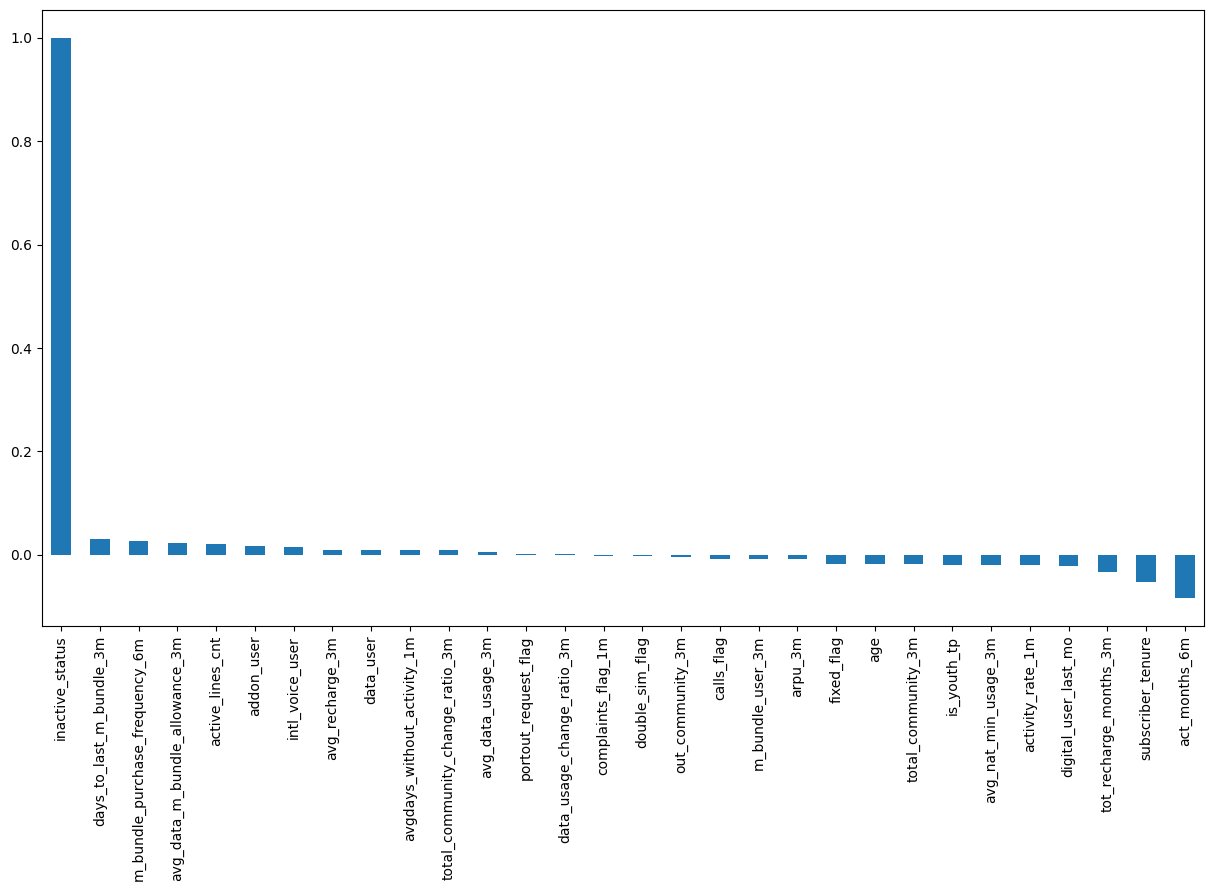

In [59]:
#Get Correlation of "inactivity" with other variables:
plt.figure(figsize=(15,8))
df4.corr()['inactive_status'].sort_values(ascending = False).plot(kind='bar')

In [60]:
df4

,msisdn,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,bundle_user_type,calls_flag,county_1m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,portout_request_flag,preferred_channel_3m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m,activity_rate_1m,inactive_status,age,fixed_flag
0,001248867353,10240.00,9.67,6.0,1.0,0,0,1500.00,11099.33,30.00,RegularMonthlyUser,False,TIRANE,-0.46,1,0,0,0,0,31.60,False,Shop,3.0,1,71.0,-0.30,33.032258,14.0,1500.00,1.0,0.7,0,35.0,1
1,002361544903,30720.00,47.33,6.0,1.0,0,0,916.67,34708.00,139.67,RegularMonthlyUser,False,TIRANE,-0.39,1,0,0,0,0,32.25,False,Shop,2.0,1,218.0,-0.03,77.000000,31.0,2075.00,1.0,0.9,0,33.0,1
2,003315750290,10240.00,2.67,6.0,1.0,0,0,400.00,3540.67,75.00,IrregularMonthlyUser,False,DURRES,-0.96,1,0,0,0,0,52.00,False,POS,1.0,1,17.0,-0.45,135.601947,62.0,1200.00,NaN,NaN,0,77.0,0
3,003595645669,NaN,14.67,6.0,3.0,0,0,0.00,17775.67,99.33,NonMonthlyUser,True,DURRES,-0.50,1,1,1,0,0,NaN,False,NA,0.0,0,88.0,-0.04,18.096774,90.0,0.00,2.0,0.1,0,23.0,1
4,004025877068,7168.00,5.67,6.0,2.0,0,0,900.00,0.00,20.00,RegularMonthlyUser,False,KORCE,0.00,0,0,0,0,0,34.80,False,POS,3.0,1,44.0,-0.03,163.096774,7.0,900.00,3.0,0.3,0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341751,998408743878,7168.00,9.67,4.0,1.0,0,0,1383.33,14215.00,169.67,RegularMonthlyUser,False,SHKODER,-0.36,1,0,0,0,0,32.00,False,Shop,3.0,1,87.0,0.12,3.677419,9.0,1384.00,1.0,0.9,0,27.0,0
341752,998484569325,13653.33,18.33,6.0,1.0,0,0,676.00,20602.67,314.00,RegularMonthlyUser,False,SHKODER,-0.03,1,0,0,0,0,30.60,False,POS,3.0,1,81.0,-0.09,35.161290,2.0,901.33,1.0,1.0,0,34.0,0
341753,998936976365,27306.67,19.33,6.0,1.0,0,0,1636.15,20720.67,101.33,RegularMonthlyUser,False,TIRANE,-0.47,1,0,1,0,0,30.60,False,POS,3.0,1,100.0,-0.24,38.387097,13.0,1616.67,1.0,0.5,0,57.0,0
341754,998965180226,10240.00,15.33,6.0,1.0,0,0,1033.83,21681.33,15.00,IrregularMonthlyUser,False,LEZHE,4.86,1,1,0,0,0,39.00,False,POS,3.0,1,60.0,-0.38,16.064516,43.0,1313.33,NaN,NaN,1,25.0,0


In [61]:
df4.shape

(341756, 34)

<Axes: >

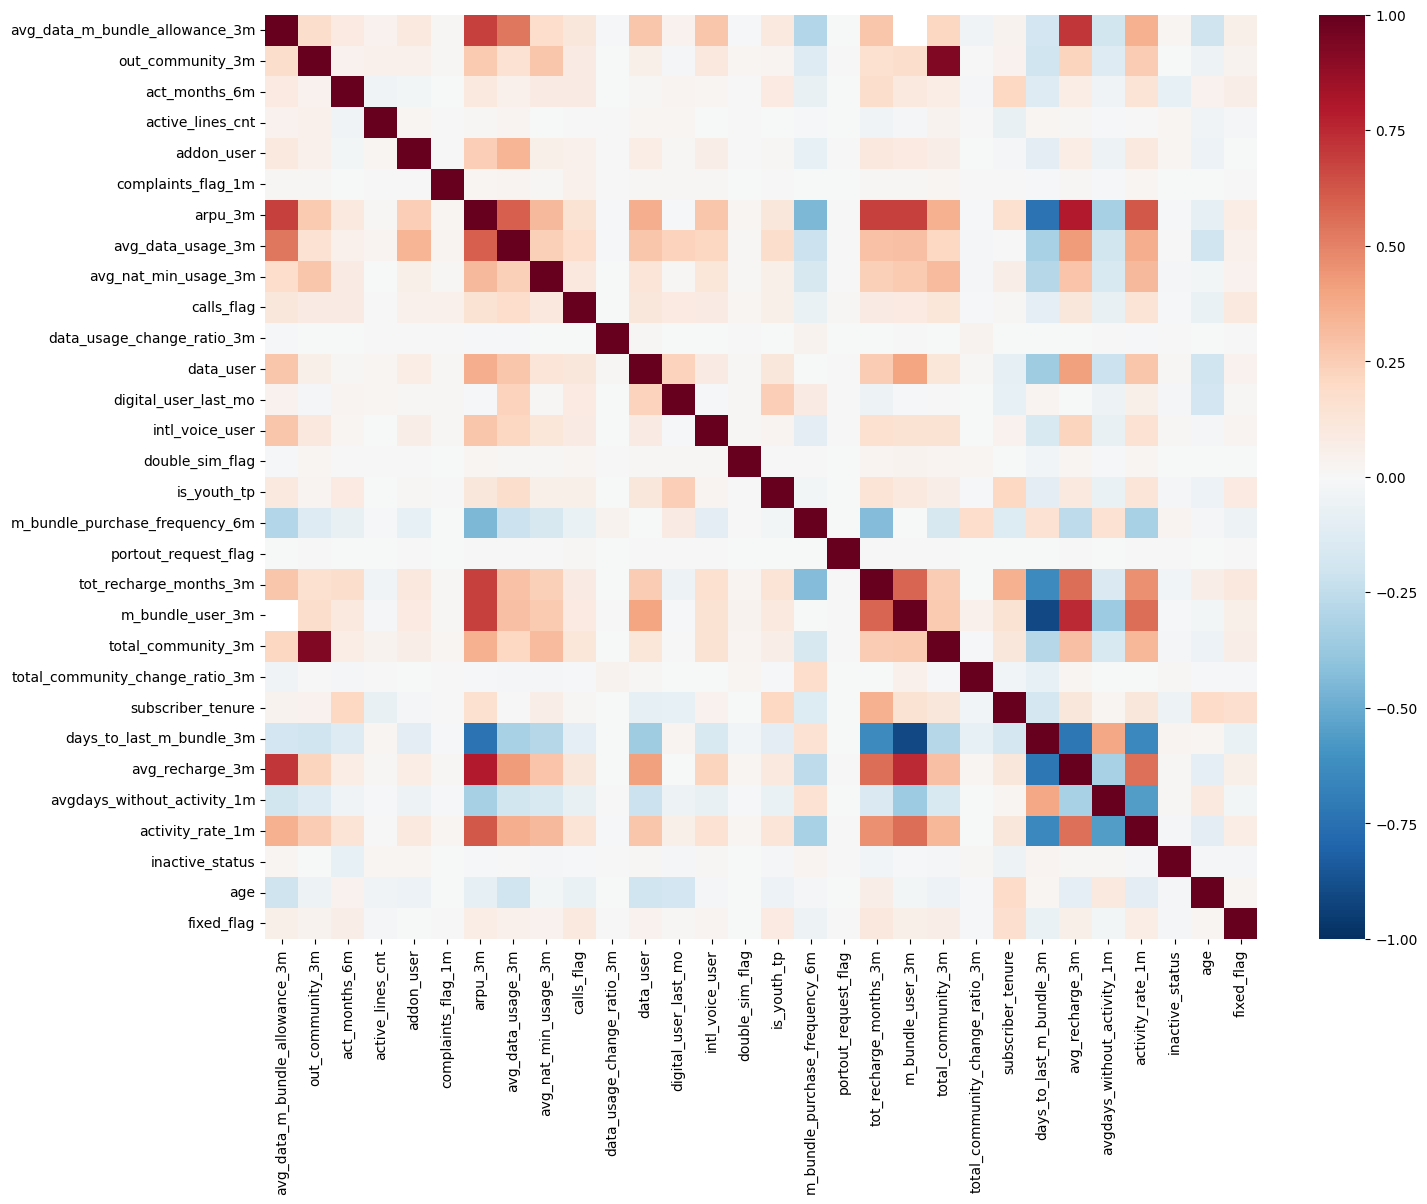

In [62]:
# Correlation matrix with all the features
plt.figure(figsize=(16,12))
sns.heatmap(df4.corr()
            , cmap="RdBu_r"
            , vmin=-1
           # ,annot=True
            , vmax=1)

In [63]:
df4

,msisdn,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,bundle_user_type,calls_flag,county_1m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,portout_request_flag,preferred_channel_3m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m,activity_rate_1m,inactive_status,age,fixed_flag
0,001248867353,10240.00,9.67,6.0,1.0,0,0,1500.00,11099.33,30.00,RegularMonthlyUser,False,TIRANE,-0.46,1,0,0,0,0,31.60,False,Shop,3.0,1,71.0,-0.30,33.032258,14.0,1500.00,1.0,0.7,0,35.0,1
1,002361544903,30720.00,47.33,6.0,1.0,0,0,916.67,34708.00,139.67,RegularMonthlyUser,False,TIRANE,-0.39,1,0,0,0,0,32.25,False,Shop,2.0,1,218.0,-0.03,77.000000,31.0,2075.00,1.0,0.9,0,33.0,1
2,003315750290,10240.00,2.67,6.0,1.0,0,0,400.00,3540.67,75.00,IrregularMonthlyUser,False,DURRES,-0.96,1,0,0,0,0,52.00,False,POS,1.0,1,17.0,-0.45,135.601947,62.0,1200.00,NaN,NaN,0,77.0,0
3,003595645669,NaN,14.67,6.0,3.0,0,0,0.00,17775.67,99.33,NonMonthlyUser,True,DURRES,-0.50,1,1,1,0,0,NaN,False,NA,0.0,0,88.0,-0.04,18.096774,90.0,0.00,2.0,0.1,0,23.0,1
4,004025877068,7168.00,5.67,6.0,2.0,0,0,900.00,0.00,20.00,RegularMonthlyUser,False,KORCE,0.00,0,0,0,0,0,34.80,False,POS,3.0,1,44.0,-0.03,163.096774,7.0,900.00,3.0,0.3,0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341751,998408743878,7168.00,9.67,4.0,1.0,0,0,1383.33,14215.00,169.67,RegularMonthlyUser,False,SHKODER,-0.36,1,0,0,0,0,32.00,False,Shop,3.0,1,87.0,0.12,3.677419,9.0,1384.00,1.0,0.9,0,27.0,0
341752,998484569325,13653.33,18.33,6.0,1.0,0,0,676.00,20602.67,314.00,RegularMonthlyUser,False,SHKODER,-0.03,1,0,0,0,0,30.60,False,POS,3.0,1,81.0,-0.09,35.161290,2.0,901.33,1.0,1.0,0,34.0,0
341753,998936976365,27306.67,19.33,6.0,1.0,0,0,1636.15,20720.67,101.33,RegularMonthlyUser,False,TIRANE,-0.47,1,0,1,0,0,30.60,False,POS,3.0,1,100.0,-0.24,38.387097,13.0,1616.67,1.0,0.5,0,57.0,0
341754,998965180226,10240.00,15.33,6.0,1.0,0,0,1033.83,21681.33,15.00,IrregularMonthlyUser,False,LEZHE,4.86,1,1,0,0,0,39.00,False,POS,3.0,1,60.0,-0.38,16.064516,43.0,1313.33,NaN,NaN,1,25.0,0


## Continuous features visualisation


In [64]:
def dataframe_column_check(tmp: pd.DataFrame):
    
    #global few_value_feature_set
    #global continuous_feature_set
    #global object_feature_set
    #global left_columns
    
    few_value_feature_set = []
    for x in df4.select_dtypes(exclude='object').columns:
        if (len(df4[x].unique()) <=7):
            few_value_feature_set.append(x)

    print("few_value_feature_set: {}".format(len(few_value_feature_set)))
    
    
    continuous_feature_set = [x for x in df4.select_dtypes(include=['float', 'int']).columns if (x not in few_value_feature_set and x not in ["msisdn", "MSISDN"])]
    print("continuous_feature_set: {}".format(len(continuous_feature_set)))

    object_feature_set = list(x for x in df4.select_dtypes(include=['object', 'category']).columns if x not in ["msisdn", "MSISDN"])
    print("object_feature_set: {}".format(len(object_feature_set)))

    left_columns= [x for x in df4.columns if x not in list(set(few_value_feature_set + continuous_feature_set + object_feature_set))]
    print("left_columns: {}".format(len(left_columns)))
    print(left_columns)
    
    
    return few_value_feature_set, continuous_feature_set, object_feature_set, left_columns    

In [65]:
few_value_feature_set, continuous_feature_set, object_feature_set, left_columns = dataframe_column_check(df4[new_cols])

few_value_feature_set: 14
continuous_feature_set: 16
object_feature_set: 3
left_columns: 1
['msisdn']


In [66]:
def distribution_analysis(attr, agg_col, df:pd.DataFrame, label_true, label_false):
    #print(df.groupby(agg_col)[attr].mean())
    sns.kdeplot(df[(df[agg_col]==1) &(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label = label_true, color='red')
    sns.kdeplot(df[(df[agg_col]==0)&(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label=label_false, color='green')
    plt.title("Distribution of {} vs. {}".format(attr, agg_col))
    plt.legend()
    plt.show()

In [67]:
continuous_feature_set

['avg_data_m_bundle_allowance_3m',
 'out_community_3m',
 'active_lines_cnt',
 'arpu_3m',
 'avg_data_usage_3m',
 'avg_nat_min_usage_3m',
 'data_usage_change_ratio_3m',
 'm_bundle_purchase_frequency_6m',
 'total_community_3m',
 'total_community_change_ratio_3m',
 'subscriber_tenure',
 'days_to_last_m_bundle_3m',
 'avg_recharge_3m',
 'avgdays_without_activity_1m',
 'activity_rate_1m',
 'age']

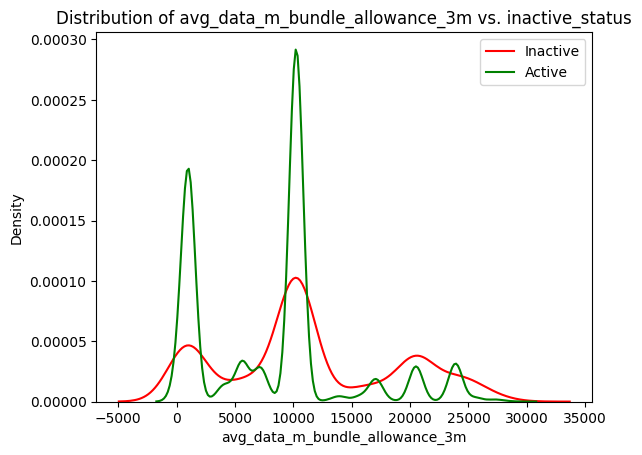

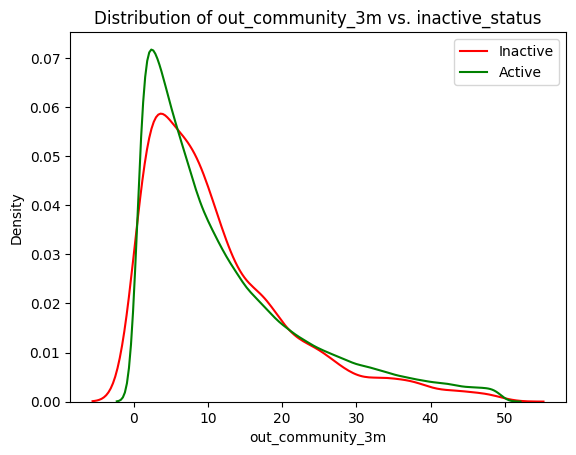

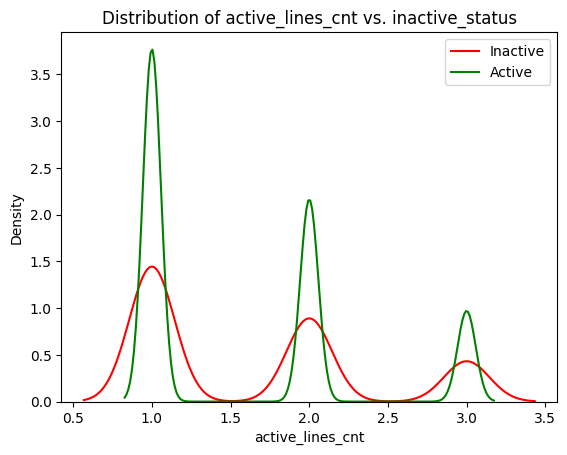

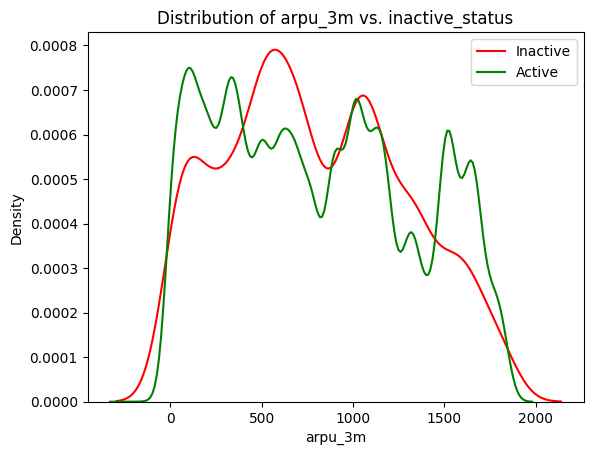

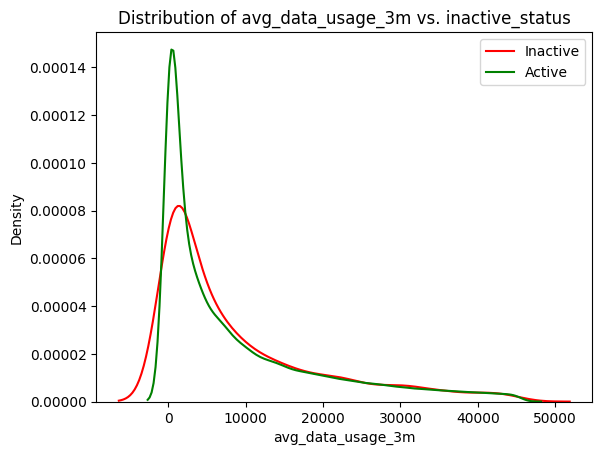

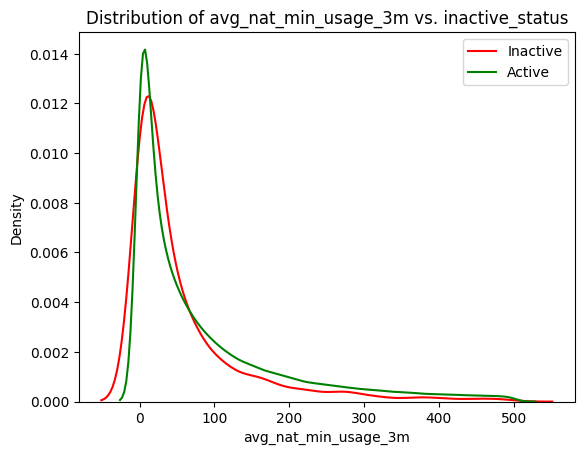

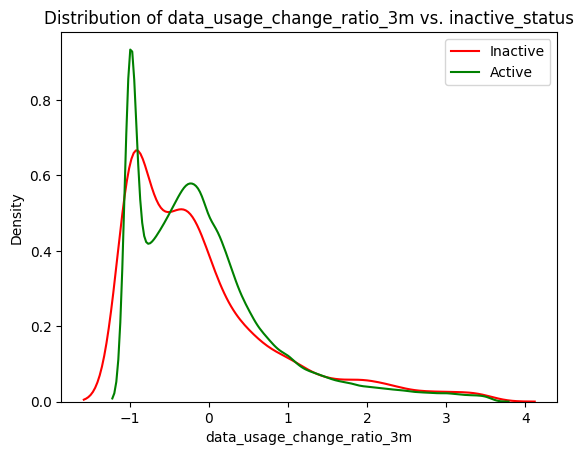

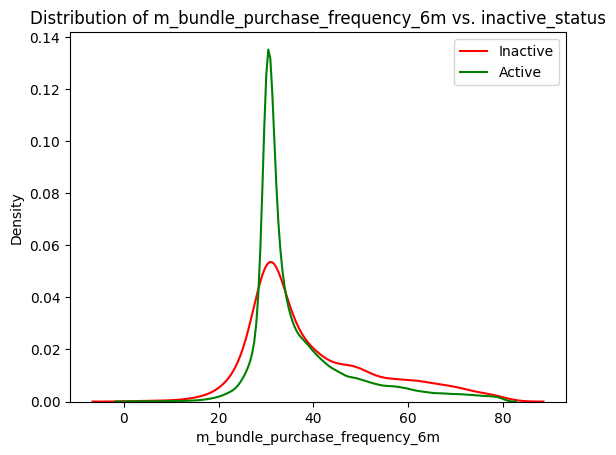

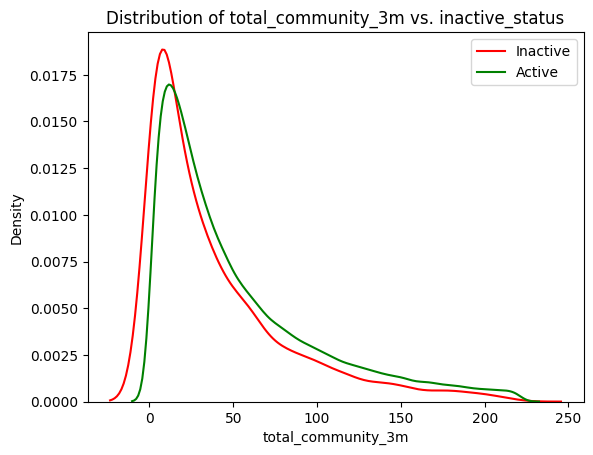

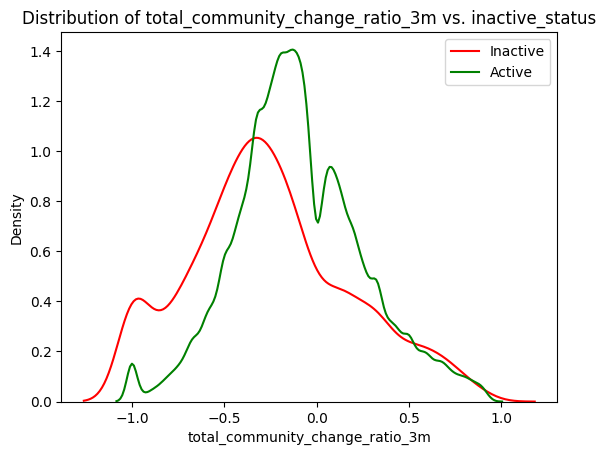

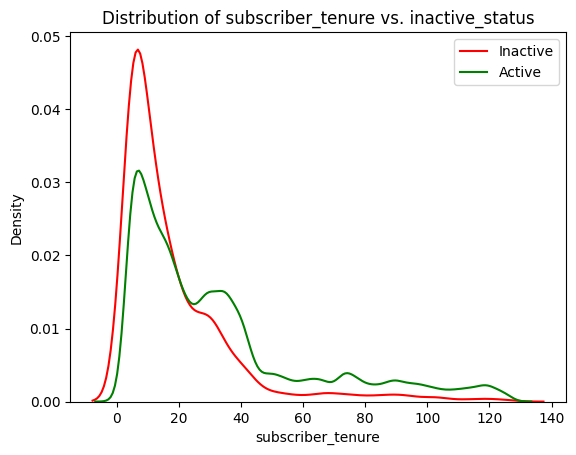

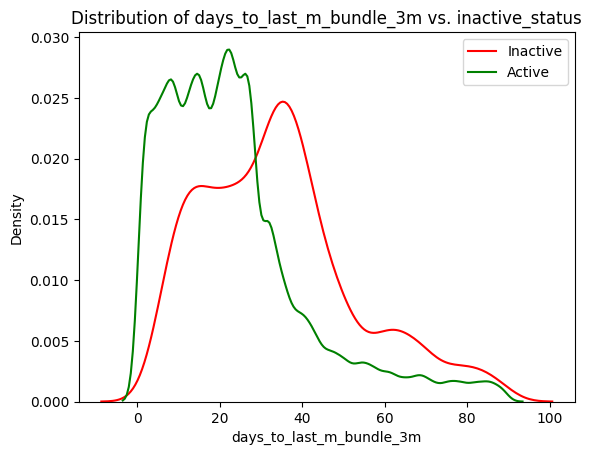

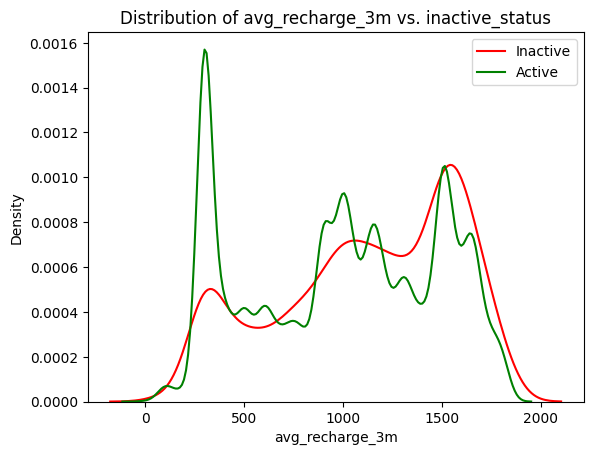

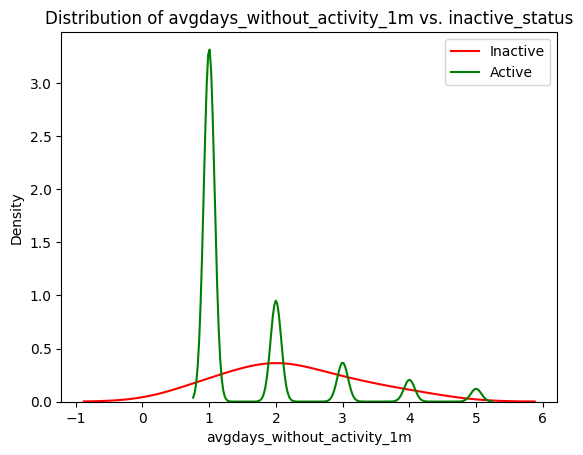

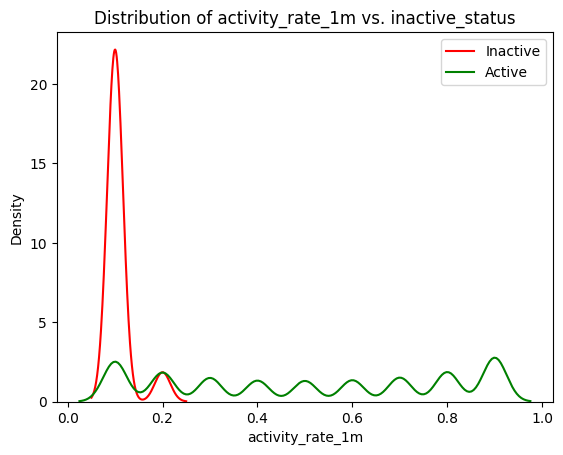

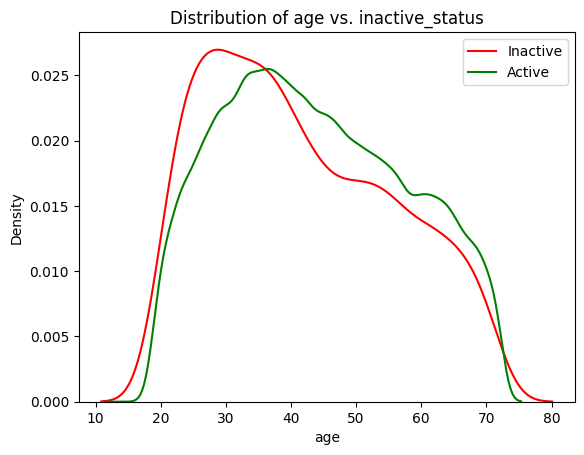

In [68]:
for x in continuous_feature_set:
    distribution_analysis(x, "inactive_status", df4, "Inactive", "Active")
    print("")

## Object features visualisation

In [69]:
def object_feature_visualize(attr, agg_col, df:pd.DataFrame):
    
    a=df4.groupby(attr).agg({"msisdn": 'count', agg_col: np.mean}).reset_index()
    a[agg_col]=a[agg_col]*100

    ax1 = sns.barplot(x=attr, y='msisdn', alpha=0.7, data=a, color='cyan')
    ax1.set_ylabel('Number of observations')
    ax1.set_xlabel(attr)

    ax2 = ax1.twinx()
    sns.pointplot(x=attr, y=agg_col, alpha=0.7, data=a, ax=ax2, color='red')
    plt.ylim([0, 105])
    ax2.set_ylabel('{} info'.format(agg_col))

    ymin, ymax = ax2.get_ylim()
    color="#3498db" # choose a color
    margin = (ymax - ymin) / 200

    [ax2.text(p[0]-margin, p[1]+margin, str(int(p[1]))+'%', color='black') for p in zip(ax2.get_xticks(), np.round(a[agg_col], 1))]

    #if title is None:
    #    title = 'Cumulative Gains Chart'
    #else:
    #    title = 'Cumulative Gains Chart for ' + title
    #plt.title(title, fontsize=10)

    ax1.set_xticklabels(a[attr], rotation=45)
    ax2.set_xticklabels(a[attr], rotation=45)

    plt.show()

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


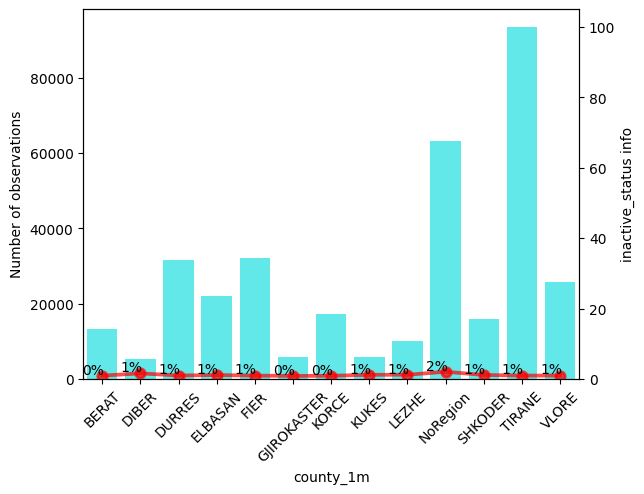

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


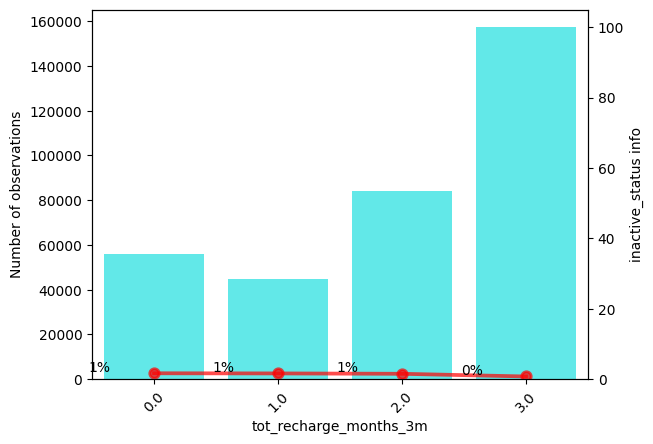

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


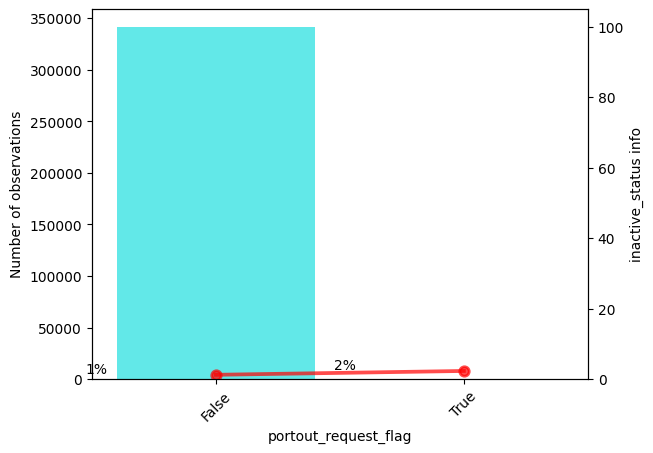

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


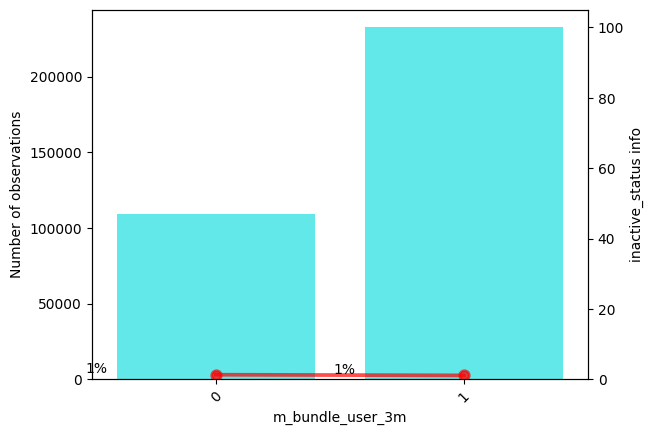

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


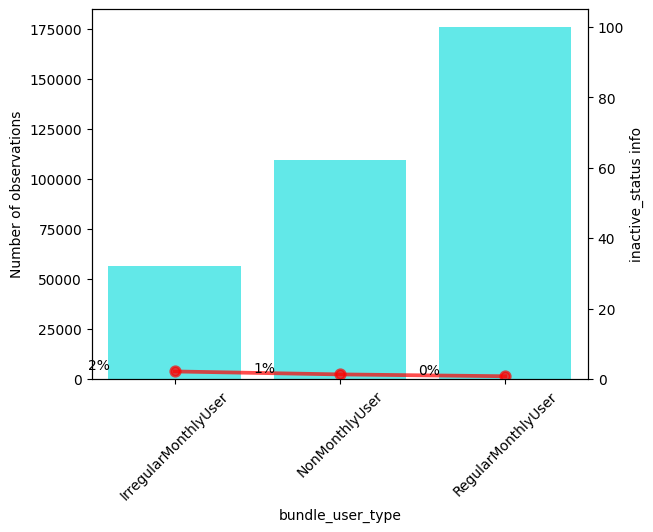

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


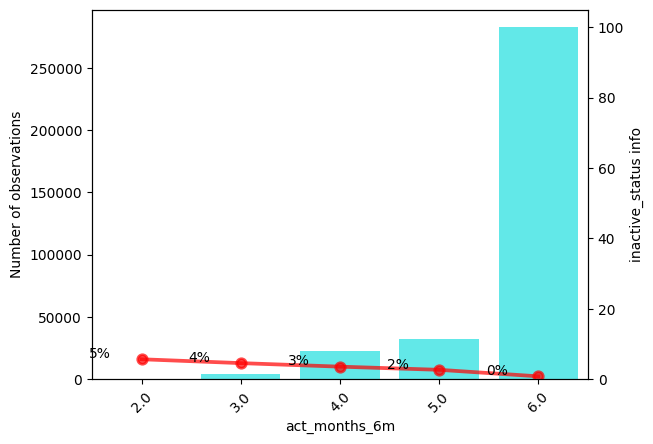

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


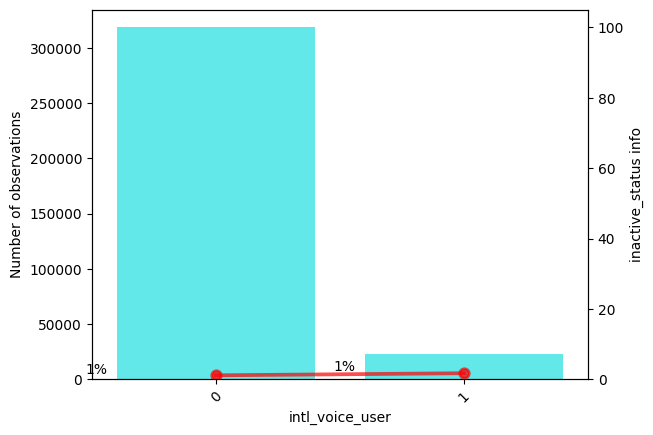

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


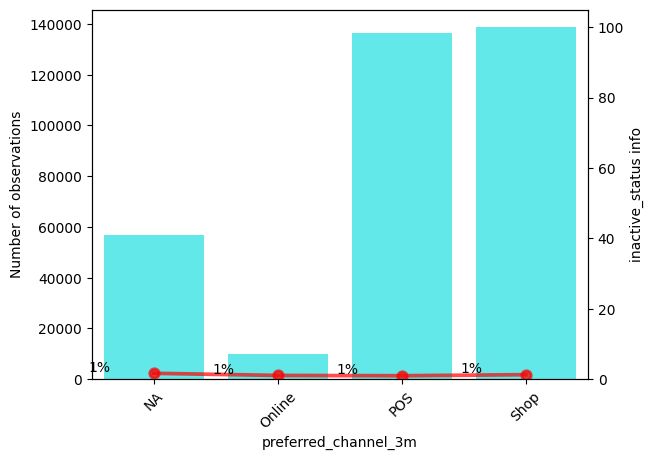

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


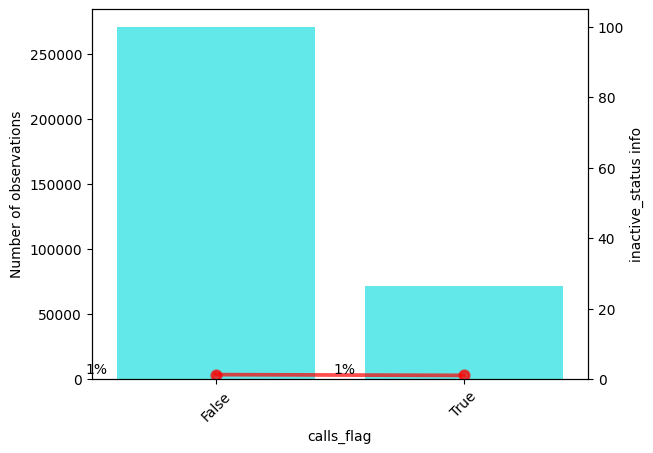

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


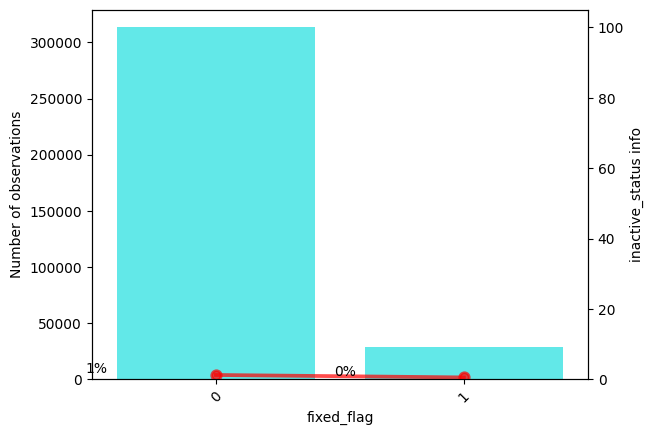

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


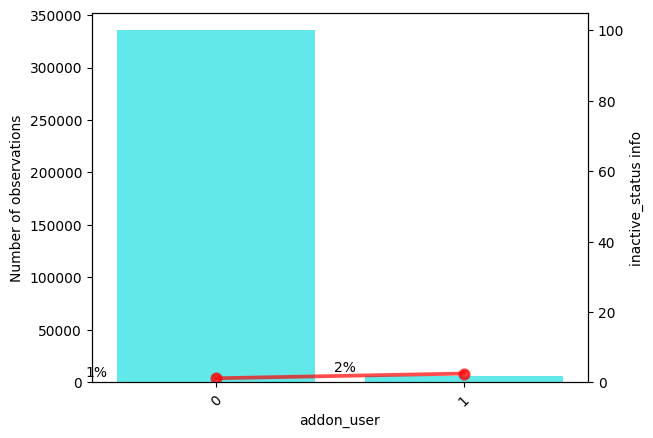

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


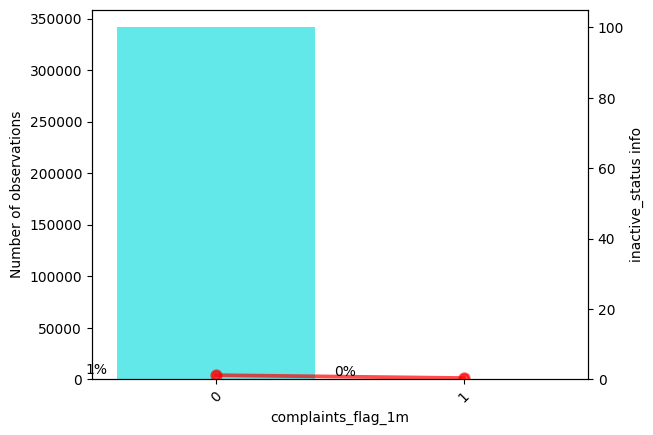

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


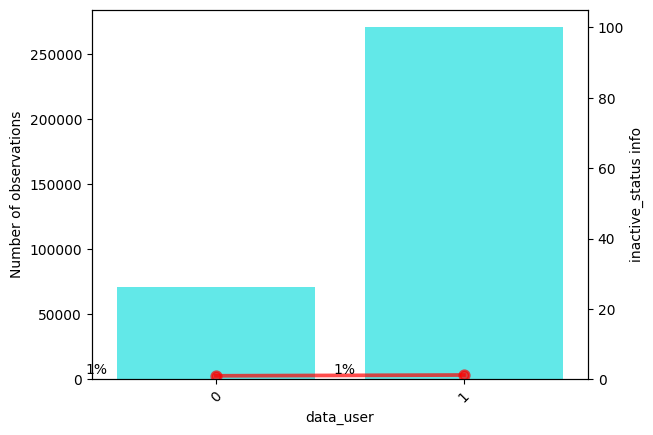

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


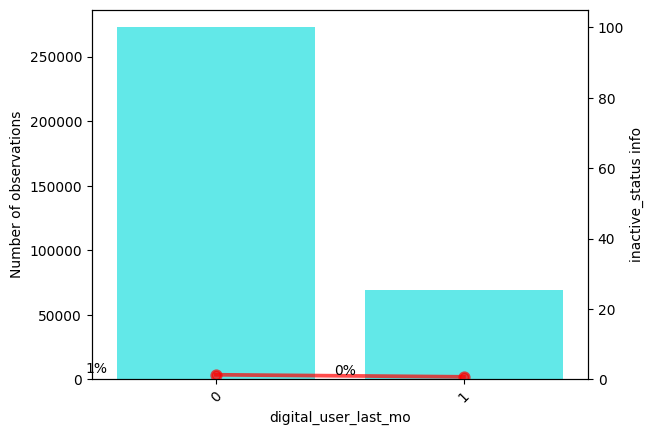

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


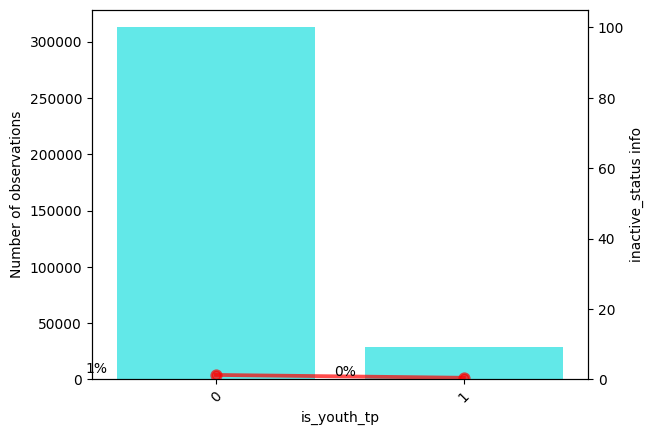

/tmp/ipykernel_20180/2703436168.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(a[attr], rotation=45)
/tmp/ipykernel_20180/2703436168.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(a[attr], rotation=45)


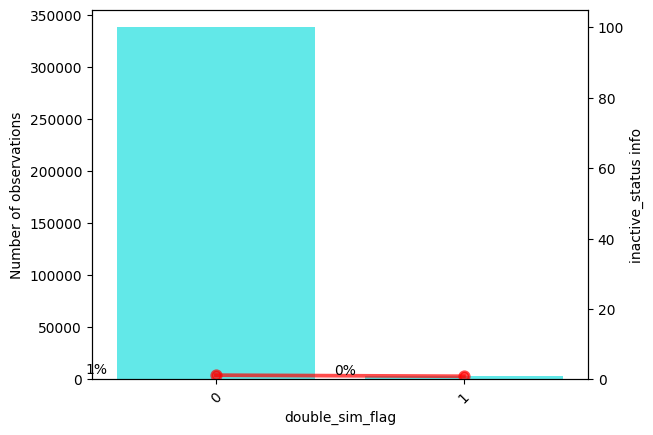

In [70]:
for col in set(object_feature_set + few_value_feature_set) - set(["inactive_status"]):
    object_feature_visualize(col, 'inactive_status', df4)

# ML Model

In [87]:
# dd = pd.read_csv(r"gs://vfal-prod-aom-rawingested/Mapping_files/test/new_DL_CRM_SHOPS.csv.gz", compression="gzip")
# dd

### Missing values

In [88]:
df.isnull().sum()

msisdn                                    0
domestic_arpu                             0
arpu_6m                                   0
act_months_6m                             0
avg_data_usage_6m                         0
m_bundle_cnt_6m                           0
preferred_bundle_6m                  736697
recharge_frequency_6m                775329
roaming_months_6m                         0
last_recharge_value_6m                    0
m_bundle_purchase_frequency_6m       946539
max_m_bundle_fee_6m                       0
m_bundle_average_price_6m            736697
domestic_arpu_3m                          0
arpu_3m                                   0
act_months_3m                             0
avg_nat_min_usage_3m                      0
avg_intl_min_usage_3m                     0
avg_data_usage_3m                         0
m_bundle_cnt_3m                           0
preferred_bundle_3m                       0
preferred_channel_3m                      0
bundle_months_3m                

In [72]:
for col in ['m_bundle_purchase_frequency_6m','avg_data_m_bundle_allowance_3m','out_community_3m','total_community_3m']:
     df4[col]=df4[col].fillna(0) 

df4.avgdays_without_activity_1m.fillna(30,inplace=True) # In 30 days has done only 1 activity
df4.activity_rate_1m.fillna(0,inplace=True)

In [73]:
X=df4.drop(['inactive_status'], axis=1)
y=df4['inactive_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6, stratify=y)

print(X_train.shape)
print(y_train.shape)
print('----')
print(X_test.shape)
print(y_test.shape)


X_test_ms=X_test.msisdn.values

X_train_ms=X_train.msisdn.values

X_test.drop(['msisdn'], axis=1, inplace=True)
X_train.drop(['msisdn'], axis=1, inplace=True)

print('----')

#print(sum(y_train)/len(y_train))
#print(sum(y_test)/len(y_test))


for col in [ 'bundle_user_type', 'county_1m', 'preferred_channel_3m', "fixed_flag",'calls_flag', 'double_sim_flag', 'portout_request_flag']:
         X_train[col]=X_train[col].astype('category')
         X_test[col]=X_test[col].astype('category')

(239229, 33)
(239229,)
----
(102527, 33)
(102527,)
----


/opt/conda/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_20180/3936142241.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=X_train[col].astype('category')
/tmp/ipykernel_20180/3936142241.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [74]:
df4.inactive_status.value_counts(normalize=True)

0    0.987997
1    0.012003
Name: inactive_status, dtype: float64

/opt/conda/miniconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: eval_metric
Train accuracy: 0.9862182644571674
Test accuracy: 0.9866111550021109
 
Confusion Matrix:
[[100569    727]
 [   686    545]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    101296
           1       0.43      0.44      0.44      1231

    accuracy                           0.99    102527
   macro avg       0.71      0.72      0.71    102527
weighted avg       0.99      0.99      0.99    102527



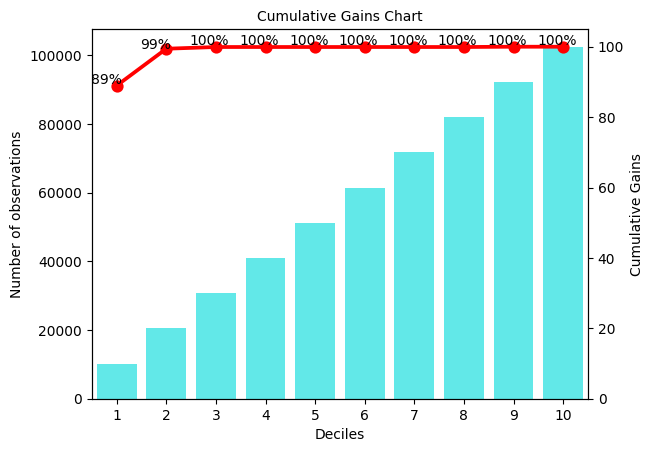

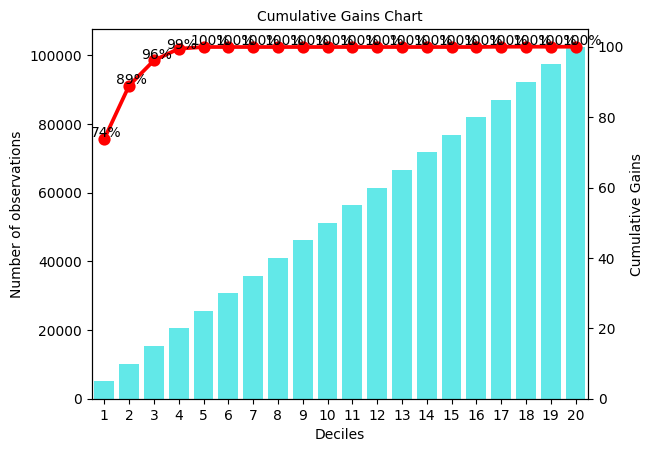

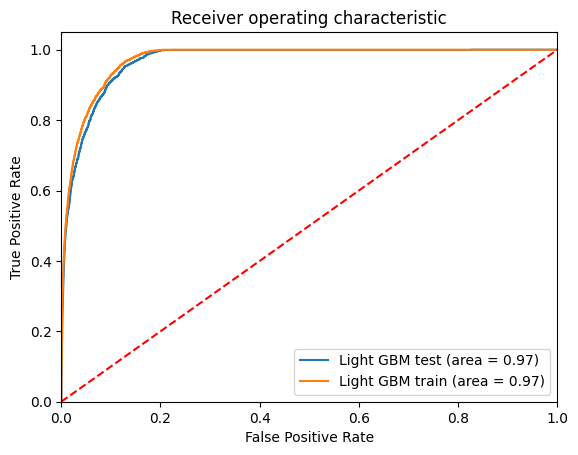

Average precision-recall score: 0.36


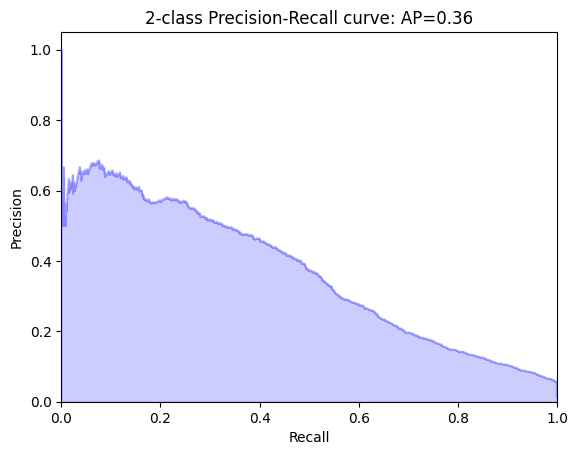

  decile    cnt  actual       gains  cntsum  true_positive_rate
0      1  10253    1095   88.952071   10253            0.106798
1      2  10253     129   99.431357   20506            0.012582
2      3  10252       6   99.918765   30758            0.000585
3      4  10253       0   99.918765   41011            0.000000
4      5  10252       0   99.918765   51263            0.000000
5      6  10253       0   99.918765   61516            0.000000
6      7  10253       0   99.918765   71769            0.000000
7      8  10252       0   99.918765   82021            0.000000
8      9  10253       1  100.000000   92274            0.000098
9     10  10253       0  100.000000  102527            0.000000
   decile   cnt  actual       gains  cntsum  true_positive_rate
0       1  5127     909   73.842405    5127            0.177297
1       2  5126     186   88.952071   10253            0.036286
2       3  5126      88   96.100731   15379            0.017167
3       4  5127      41   99.431357   20

In [75]:
import lightgbm as lgb
from generic_functions import *
from sklearn.metrics import mean_squared_error

d_train = lgb.Dataset(X_train, label=y_train, categorical_feature='auto')

params = {
    'learning_rate' : 0.05,
    'boosting_type': 'gbdt',
    #"n_estimators": 100,
    'objective': 'binary',
    'eval_metric':'auc',
    'metric': 'recall',
   #'num_leaves': 1000,
    'max_depth':3,#10
   'min_child_samples': 20,
    #'class_weight':'balanced',
   'scale_pos_weight':4,
    'num_threads':16,
    'verbose':-1,
    'num_iterations':400,
    #'early_stopping_rounds':10

}

#Training on X_Train
clf = lgb.train(params, d_train)


##Predicting on X_Test:
y_pred_lg=clf.predict(X_test)
y_pred_train_lg=clf.predict(X_train)

print("Train accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_lg.round())))
print("Test accuracy: {}".format(metrics.accuracy_score(y_train, y_pred_train_lg.round())))

print(' ')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lg.round()))
print(' ')

print('Classification Report:')
print(classification_report(y_test, y_pred_lg.round()))


act=list(y_test)
pred=list(clf.predict(X_test))

actual=pd.DataFrame(act)
prediction=pd.DataFrame(pred)

#Gains chart
gains=plot_gains_chart(actual, prediction, q=10)
plt.show()

#Gains chart
gains_2=plot_gains_chart_2(actual, prediction)

#ROC AUC SCORE
plot_roc_auc(y_train, y_test, y_pred_train_lg, y_pred_lg)
plt.show()

#Plot precision-recall curve
plot_pr_curve(y_test, y_pred_lg)
plt.show()

#Plotting gains chart
gains["true_positive_rate"]=gains["actual"]/gains["cnt"]
print(gains)
print("================")
gains_2["true_positive_rate"]=gains_2["actual"]/gains_2["cnt"]
print(gains_2)

print("===============================================================")
#print(sum(y_pred_lg.round())/len(X_test))

**Feature importance**

Text(0, 0.5, 'Feature name')

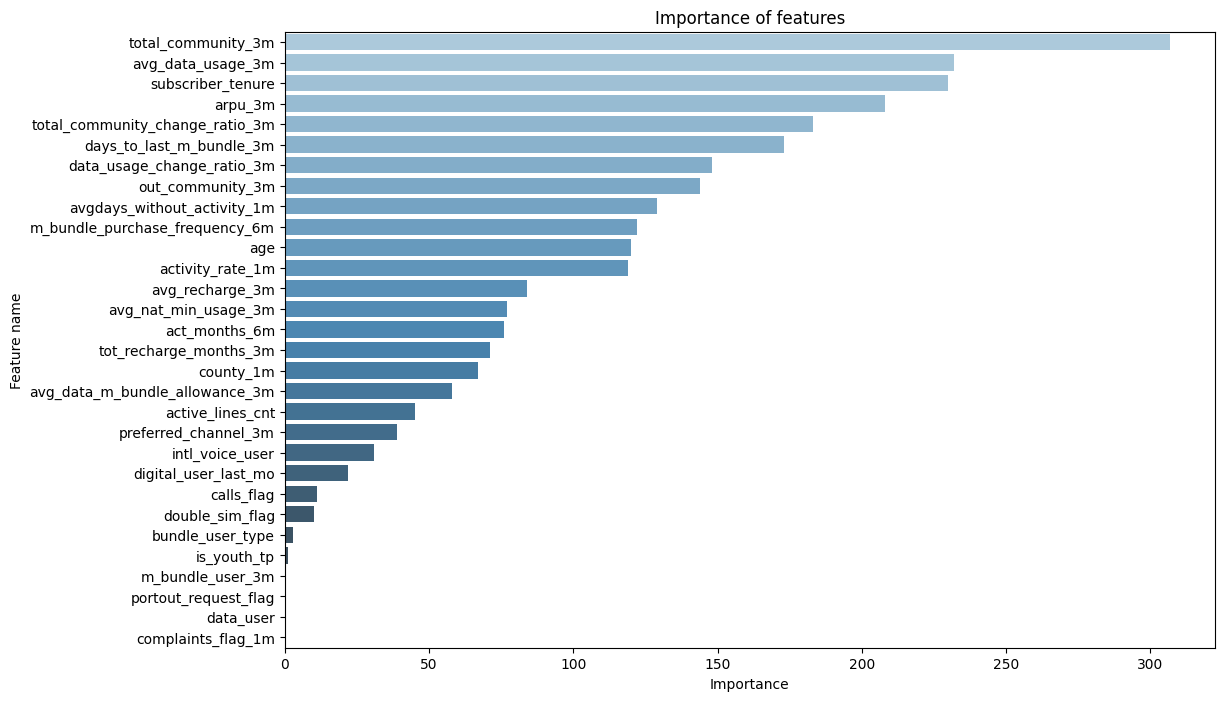

In [76]:
plt.figure(figsize=(12, 8))
feat_importance = pd.DataFrame({'feature':clf.feature_name(), 
                         'importance':clf.feature_importance('split')})
feat_importance.sort_values(by='importance', ascending=False, inplace=True)

sns.barplot(y="feature", x="importance", data=feat_importance[:30], orient='h', palette="Blues_d")
plt.title('Importance of features')
plt.xlabel('Importance')
plt.ylabel('Feature name')

## Interpretation

In [77]:
df1.shape

(342711, 32)

In [78]:
X_test.shape

(102527, 32)

In [79]:
X_test["predicted"]=y_pred_lg
X_test["msisdn"]=X_test_ms
X_test["inactive"]=y_test
X_test["decile"]=pd.qcut(X_test["predicted"], q=10, labels=np.arange(10, 0, -1))
X_test["decile_2"]=pd.qcut(X_test["predicted"], q=20, labels=np.arange(20, 0, -1))

/tmp/ipykernel_20180/1247027217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["predicted"]=y_pred_lg
/tmp/ipykernel_20180/1247027217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["msisdn"]=X_test_ms
/tmp/ipykernel_20180/1247027217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [80]:
X_test.groupby("decile").msisdn.count()

decile
10    10253
9     10253
8     10252
7     10253
6     10253
5     10252
4     10253
3     10252
2     10253
1     10253
Name: msisdn, dtype: int64

In [81]:
X_test[X_test["m_bundle_user_3m"]==1].groupby("decile").msisdn.count()

decile
10    9760
9     9108
8     9564
7     9810
6     8517
5     5611
4     7649
3     3659
2     1500
1     4570
Name: msisdn, dtype: int64

In [82]:
df4.groupby("inactive_status").mean()

,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,calls_flag,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,double_sim_flag,is_youth_tp,m_bundle_purchase_frequency_6m,portout_request_flag,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m,activity_rate_1m,age,fixed_flag
inactive_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10536.125021,13.819215,5.739307,1.914839,0.018448,0.000767,762.002176,9822.936093,111.894445,0.208726,5.759417,0.791118,0.202900,0.067655,0.010768,0.085795,26.447878,0.000379,2.006981,0.680605,68.222864,0.015158,38.079697,44.471249,890.182390,7.723951,0.500766,45.742731,0.083802
1,11599.801604,11.180495,5.248659,2.192345,0.039249,0.000244,707.015822,10591.117114,60.296950,0.178937,7.955705,0.822038,0.123598,0.099464,0.008045,0.033155,28.572238,0.000731,1.658216,0.645295,47.200390,0.081753,19.416054,54.109215,944.832106,29.920039,0.000341,43.088250,0.039005


In [83]:
X_test.groupby("decile").mean()

,avg_data_m_bundle_allowance_3m,out_community_3m,act_months_6m,active_lines_cnt,addon_user,complaints_flag_1m,arpu_3m,avg_data_usage_3m,avg_nat_min_usage_3m,data_usage_change_ratio_3m,data_user,digital_user_last_mo,intl_voice_user,is_youth_tp,m_bundle_purchase_frequency_6m,tot_recharge_months_3m,m_bundle_user_3m,total_community_3m,total_community_change_ratio_3m,subscriber_tenure,days_to_last_m_bundle_3m,avg_recharge_3m,avgdays_without_activity_1m,activity_rate_1m,age,predicted,inactive
decile,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,16730.035741,29.500684,5.873598,1.964401,0.039696,0.001463,1213.630257,16447.448008,250.514653,3.939655,0.889398,0.183458,0.107676,0.119672,34.678377,2.569492,0.951917,141.422120,0.018263,47.574826,15.255828,1242.690480,1.052570,0.850649,46.456159,0.000003,0.000000
9,14806.645766,22.647587,5.908515,1.932508,0.021555,0.001268,988.940505,12712.447080,218.353602,5.793270,0.884034,0.211840,0.072954,0.126207,33.278973,2.260119,0.888325,107.713840,-0.002013,43.607583,31.325758,1139.205800,1.024286,0.798098,45.881693,0.000007,0.000098
8,17190.224378,20.704322,5.900897,1.882462,0.026434,0.000585,1151.871855,15809.680550,178.783298,1.293717,0.933281,0.235271,0.100956,0.133828,32.627923,2.563597,0.932891,98.115197,-0.012265,43.700522,25.218787,1234.272703,1.015314,0.848088,44.503219,0.000008,0.000000
7,19623.507506,20.065732,5.849312,1.860431,0.032673,0.001365,1305.109848,19590.216897,172.830948,0.712467,0.950844,0.242466,0.129523,0.126402,32.734848,2.734029,0.956793,97.331610,-0.012748,41.644681,21.324978,1324.242769,1.053253,0.860499,42.665756,0.000011,0.000000
6,12952.721372,15.173647,5.613381,1.902565,0.029942,0.001268,976.854271,13707.844257,119.502443,9.741173,0.849605,0.244124,0.102507,0.100166,32.698307,2.494489,0.830684,74.914367,0.103580,45.342960,30.861894,1062.898969,1.617088,0.688384,44.388764,0.000017,0.000000
5,5852.327276,7.091580,5.823839,1.850858,0.004877,0.000293,511.104722,4984.344875,51.305638,5.244192,0.824717,0.331545,0.028092,0.090909,23.000827,1.805892,0.547308,37.865685,0.011549,38.455095,56.891533,672.365203,2.673625,0.399902,46.932208,0.000036,0.000000
4,8798.717223,9.549808,5.634351,1.941188,0.011606,0.001365,705.760692,7844.129641,58.775156,11.407297,0.859943,0.307715,0.061250,0.074515,31.973481,2.067590,0.746026,47.873208,0.067415,35.168448,40.800254,874.403136,2.315517,0.412816,44.956305,0.000075,0.000000
3,3355.643609,4.749107,5.682306,1.864417,0.005072,0.000488,319.182404,2254.065668,23.789843,8.186405,0.622513,0.124464,0.031311,0.037749,16.117767,1.705911,0.356906,26.975907,0.026263,42.686631,70.791845,504.105719,9.086812,0.092577,49.208740,0.003656,0.000585
2,487.463474,2.028965,5.657954,1.913879,0.000390,0.000098,91.264647,189.120181,6.390741,3.816071,0.404857,0.039306,0.008778,0.015313,5.841019,0.766410,0.146299,16.956110,-0.014277,24.144418,84.429338,236.090730,29.959134,0.000185,48.200137,0.052974,0.012582


In [84]:
df4['inactive_status'].value_counts(normalize=True)

0    0.987997
1    0.012003
Name: inactive_status, dtype: float64

# Exporting the algorithm for future use

In [85]:
import datetime
now=str(datetime.datetime.now())
todays_date=now[:10]
todays_date

# In[378]:
import pickle
# now you can save it to a file

filename = "inactivity_prediction_{}.pkl".format(todays_date)

with open(filename, 'wb') as f:
    pickle.dump(clf, f)
    
print(filename)

inactivity_prediction_2024-03-01.pkl
